In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv(r"C:\Users\Aleyna\Desktop\KHAS\KHAS 2022-2023 bahar\Mis220\data\train.csv")
df = pd.DataFrame(df)


In [7]:
cols = []
count = 0 
for i in df.columns:
    count +=1
    cols.append("Column{i}".format(i=count))

In [8]:
df.columns = cols
df

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column113,Column114,Column115,Column116,Column117,Column118,Column119,Column120,Column121,Column122
0,236977,-92,NaN,NaN,NaN,Y,Othr,NaN,0,3,...,NaN,-1994,NaN,NaN,0,Mard,0.0,NaN,0,0
1,168821,-1646,0.1124,0.8504,Panl,N,Bus3,0.0387,0,2,...,2.0,-2842,0.9891,0.0000,0,Sind,0.0,0.3750,0,1
2,94708,-1651,0.0263,NaN,Blok,N,Bus3,NaN,0,2,...,4.0,-1345,0.9682,0.0000,0,Sind,0.0,0.0417,0,1
3,84556,-977,NaN,NaN,NaN,N,Rest,NaN,0,2,...,NaN,-852,NaN,NaN,0,Sind,0.0,NaN,0,0
4,114510,365243,0.1067,0.8096,Panl,N,XNAA,0.0525,0,2,...,2.0,-4138,0.9861,0.0000,0,Mard,0.0,0.4583,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246002,248161,-595,NaN,NaN,NaN,N,Bus3,NaN,0,2,...,NaN,-4420,NaN,NaN,0,Mard,0.0,NaN,0,0
246003,257069,-4334,0.1145,0.8368,Panl,N,Mede,0.1180,0,2,...,4.0,-2561,0.9881,0.0000,0,Sind,0.0,0.3333,0,0
246004,154350,365243,0.3025,0.6056,Mixd,N,XNAA,0.2233,0,2,...,1.0,-4636,0.9712,0.0631,0,Cive,0.0,0.1667,0,0
246005,148183,365243,NaN,NaN,NaN,N,XNAA,NaN,0,3,...,5.0,-4636,NaN,NaN,0,Mard,0.0,NaN,0,1


In [9]:
for c,v in df.isnull().sum().items(): 
    if v > (df.shape[0]*(0.20)): #if the missing value is more than 20% of the data, then that column is not informative for me
        df = df.drop(columns=c, axis = 1) #so i drop it

In [10]:
df.Column122.value_counts(normalize=True)


Column122
0    0.919271
1    0.080729
Name: proportion, dtype: float64

In [11]:
binary = []
categorical = []
numerical = []
for i in df.columns:
    if df[i].dtypes == "object":
        if df[i].nunique() == 2:
            binary.append(df[i])
        else: 
            categorical.append(df[i])
    elif df[i].dtypes == "int64" or df[i].dtypes == "float64":
        if df[i].nunique() == 2:
            binary.append(df[i])
        else:
            numerical.append(df[i])
# Here i divided the data into three categories

In [12]:
binary = pd.DataFrame(binary).T
binary

,Column6,Column9,Column16,Column20,Column21,Column24,Column25,Column27,Column29,Column30,...,Column99,Column101,Column104,Column105,Column106,Column107,Column109,Column117,Column121,Column122
0,Y,0,0,0,0,0,0,0,0,0,...,0,0,Cass,1,0,0,0,0,0,0
1,N,0,0,0,1,0,0,0,0,0,...,0,0,Cass,1,0,0,0,0,0,1
2,N,0,0,0,1,0,0,0,0,0,...,0,0,Cass,1,0,0,0,0,0,1
3,N,0,0,0,0,0,0,0,0,0,...,0,0,Cass,1,0,0,0,0,0,0
4,N,0,0,0,1,0,0,0,0,0,...,0,0,Revs,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246002,N,0,0,0,0,0,1,0,0,0,...,0,0,Revs,1,0,0,0,0,0,0
246003,N,0,0,0,0,0,0,0,0,0,...,0,0,Cass,1,0,0,0,0,0,0
246004,N,0,0,0,0,0,0,0,0,1,...,0,0,Cass,0,0,0,0,0,0,0
246005,N,0,0,0,1,0,0,0,0,0,...,0,0,Cass,0,0,0,0,0,0,1


In [13]:
binary.isnull().sum()

Column6      0
Column9      0
Column16     0
Column20     0
Column21     0
Column24     0
Column25     0
Column27     0
Column29     0
Column30     0
Column34     0
Column43     0
Column47     0
Column48     0
Column51     0
Column53     0
Column56     0
Column63     0
Column65     0
Column66     0
Column72     0
Column76     0
Column77     0
Column82     0
Column95     0
Column98     0
Column99     0
Column101    0
Column104    0
Column105    0
Column106    0
Column107    0
Column109    0
Column117    0
Column121    0
Column122    0
dtype: int64

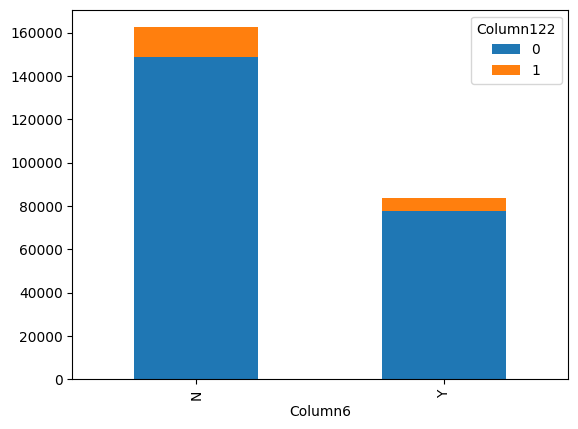

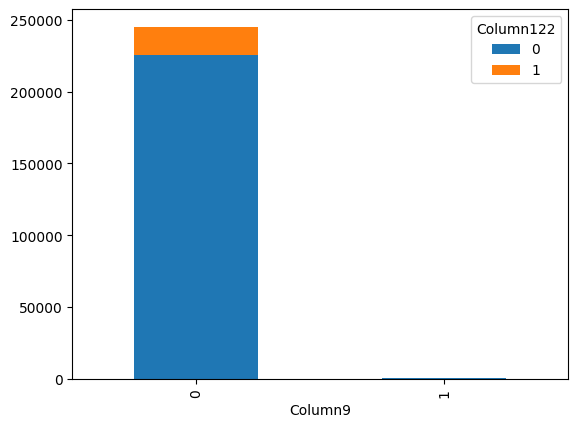

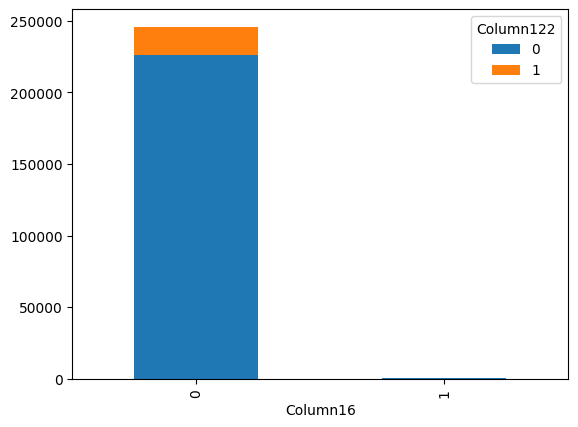

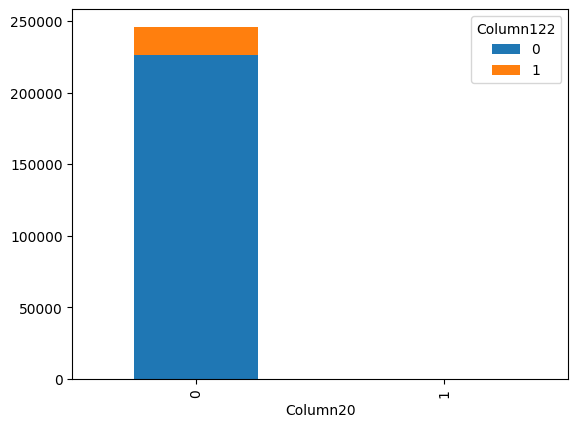

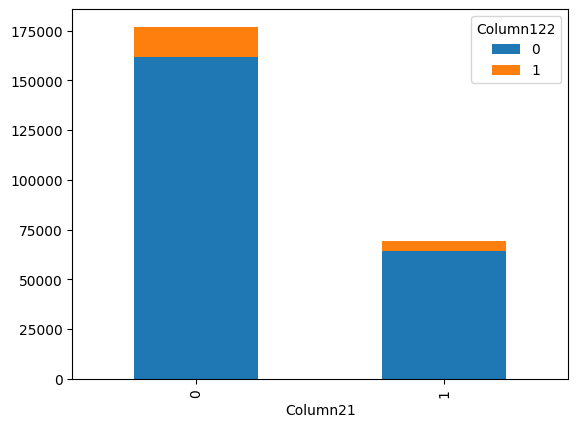

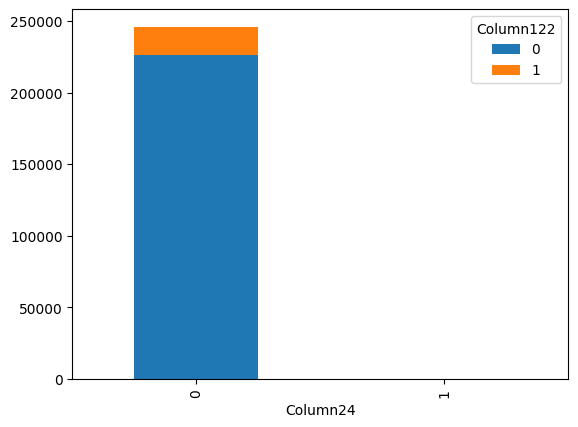

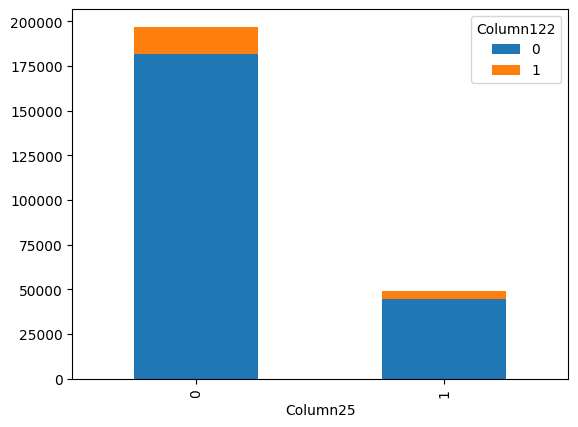

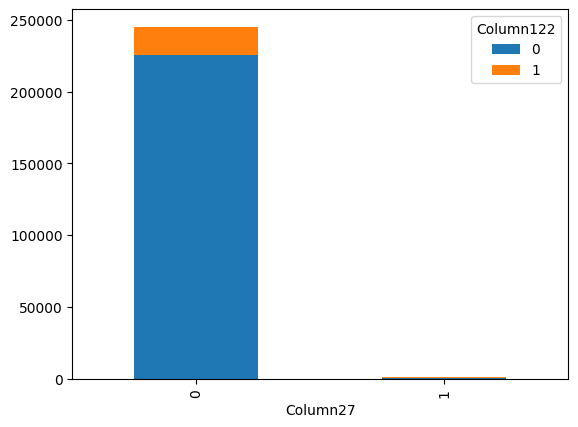

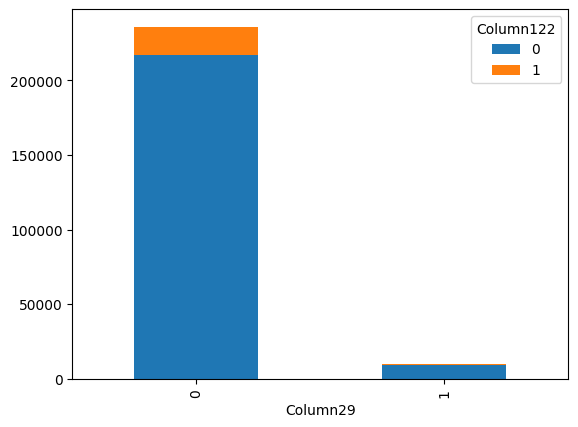

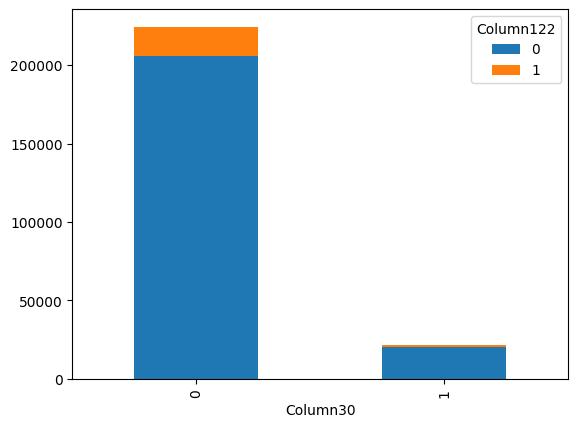

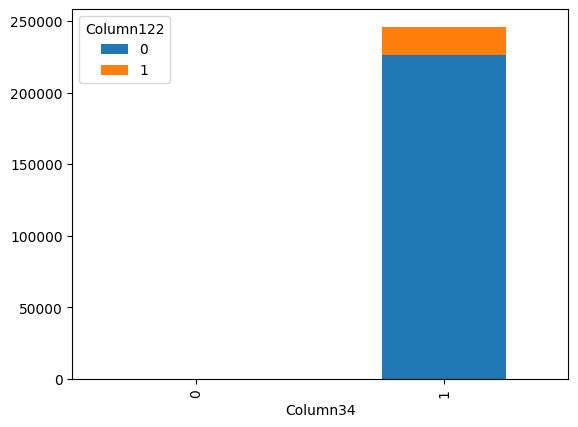

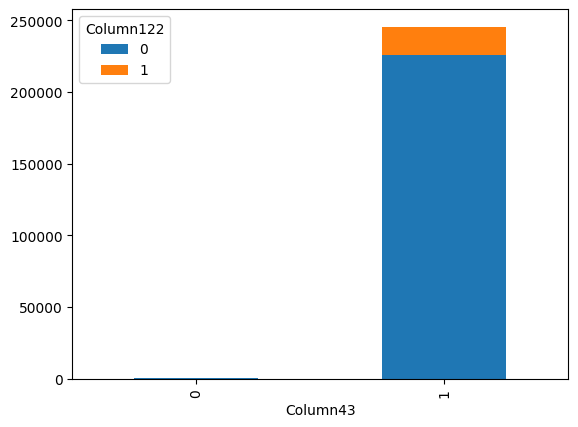

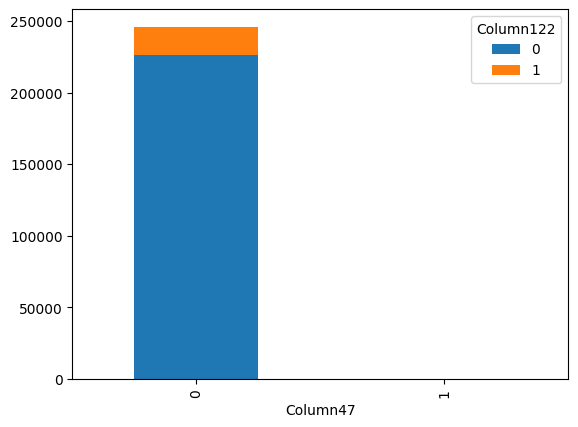

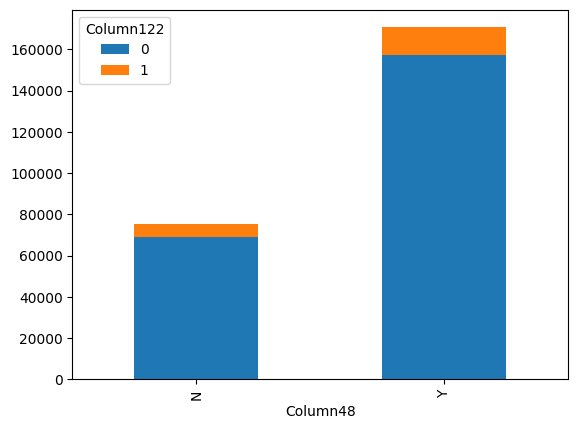

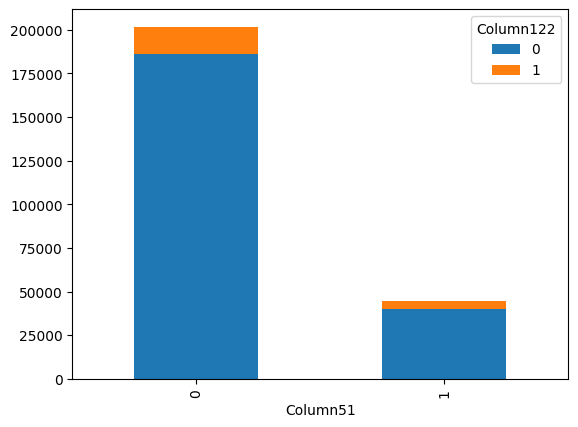

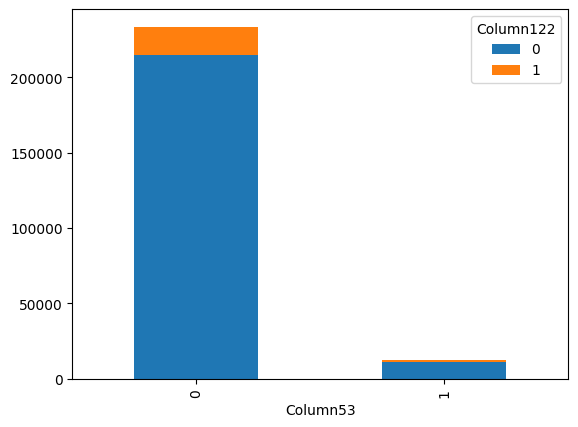

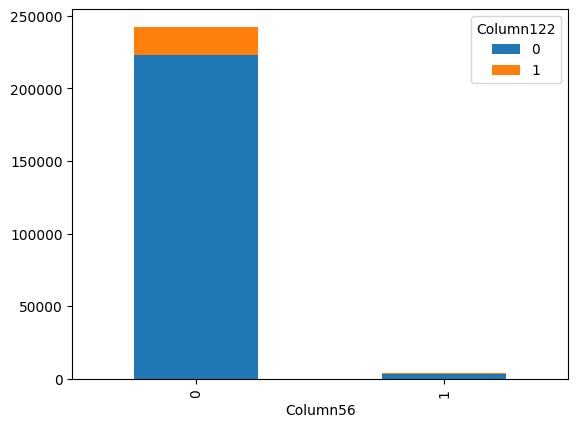

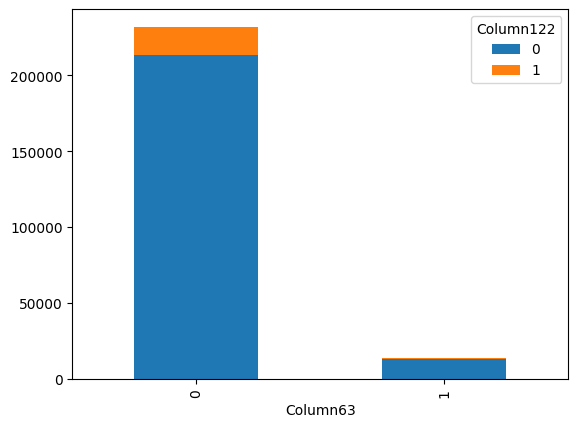

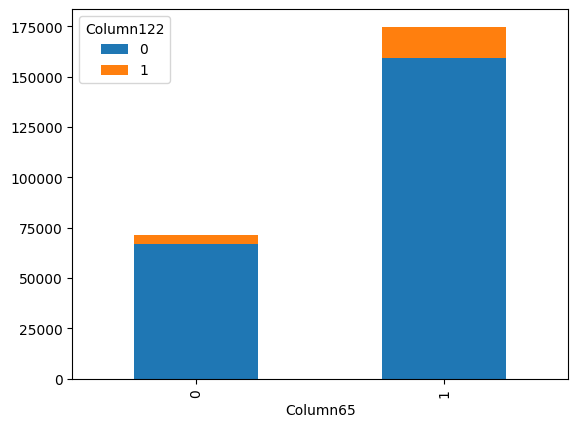

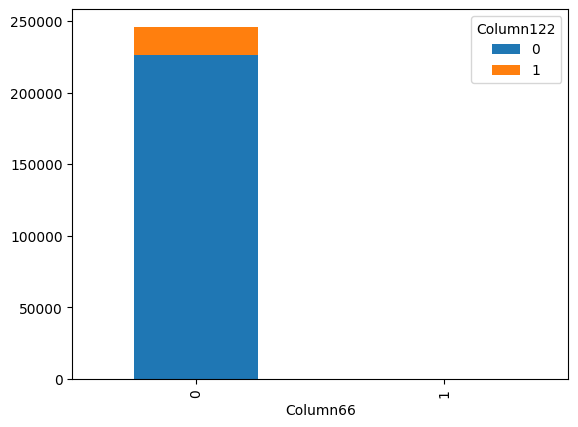

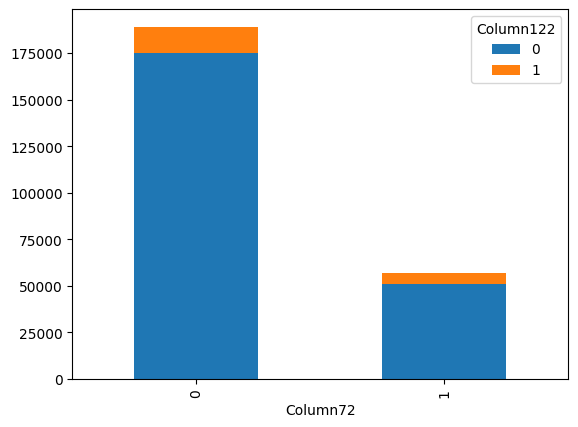

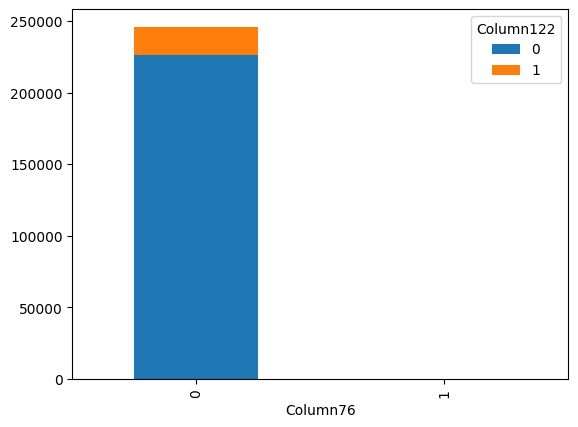

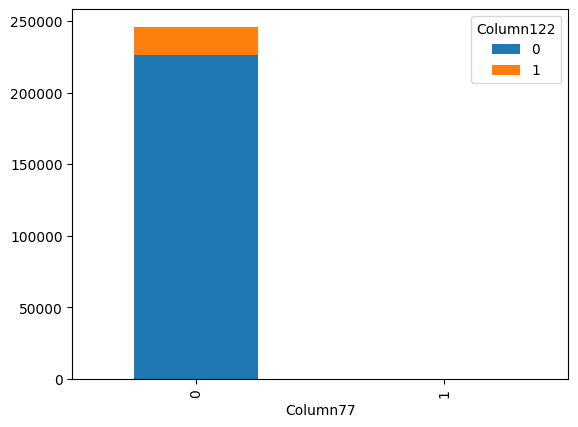

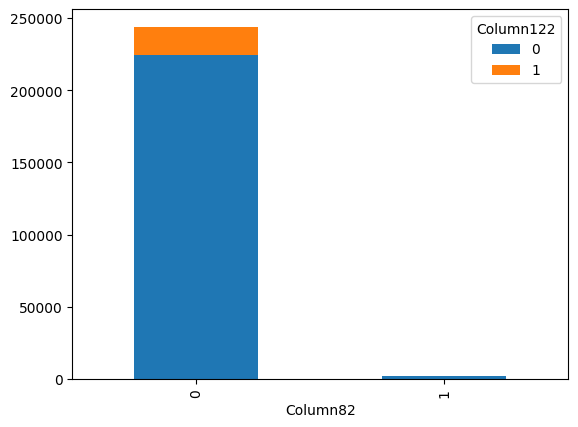

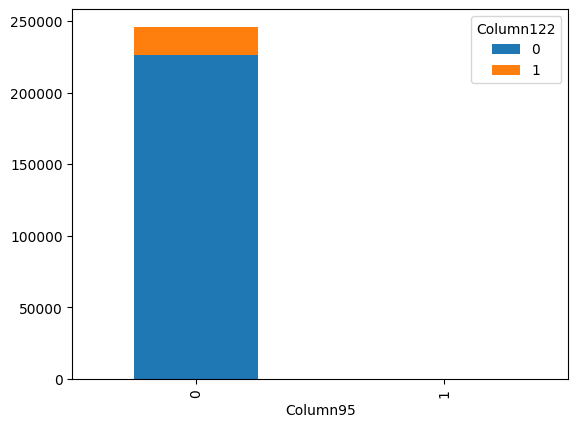

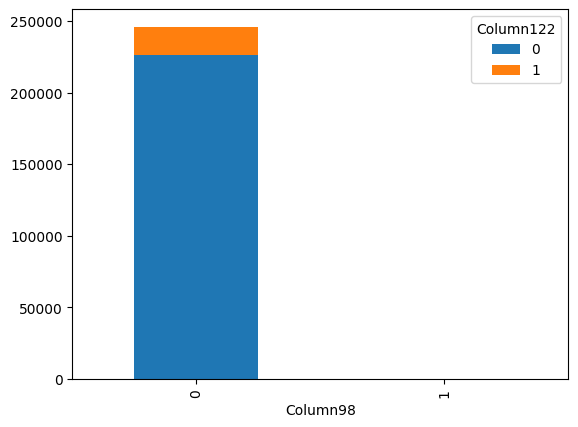

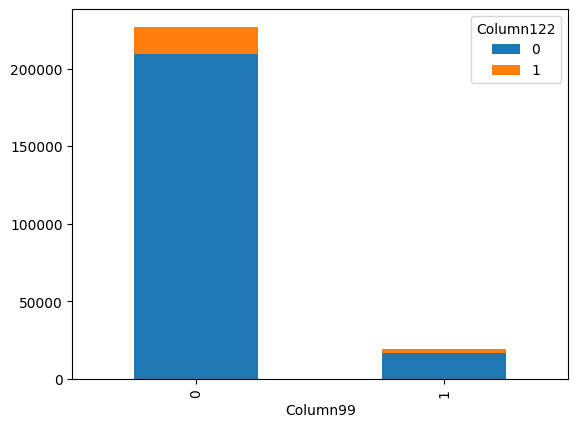

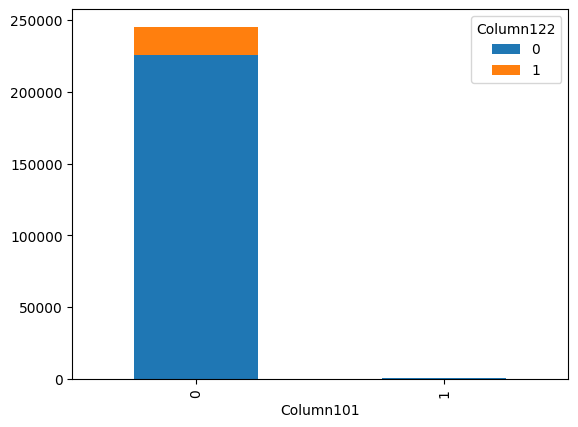

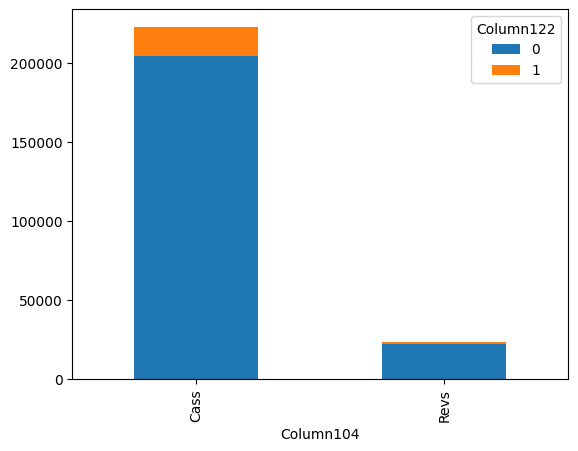

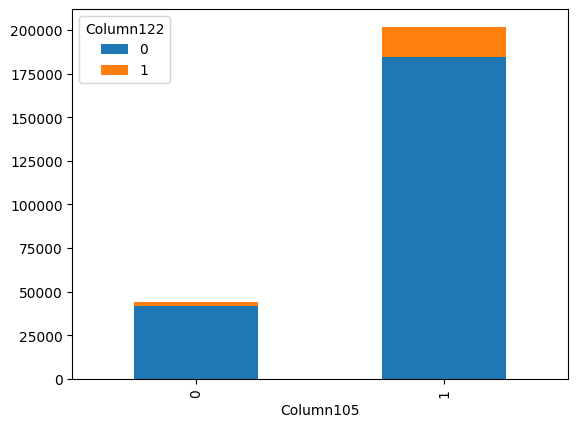

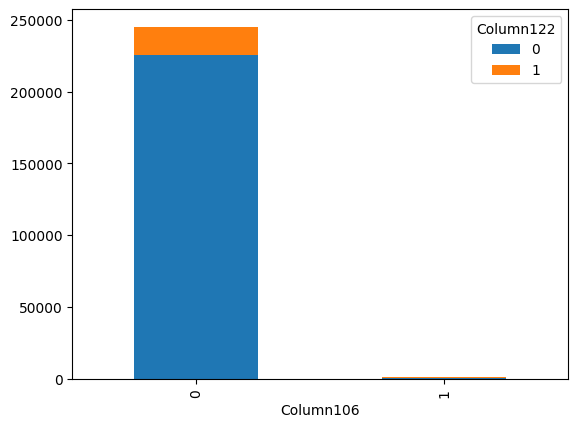

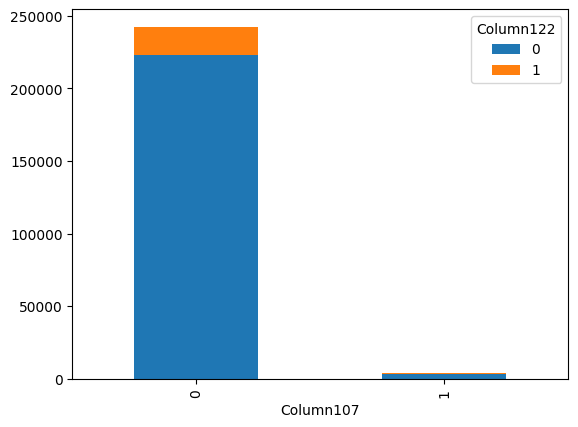

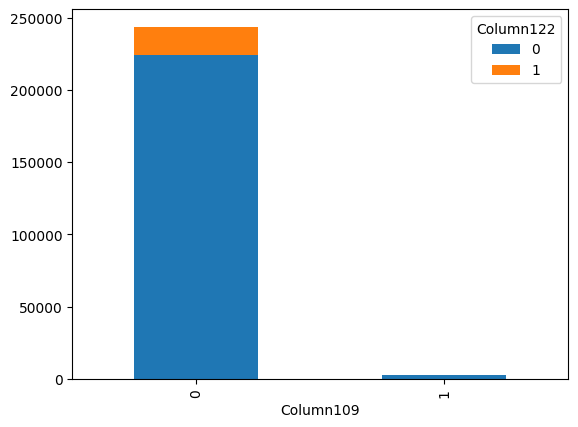

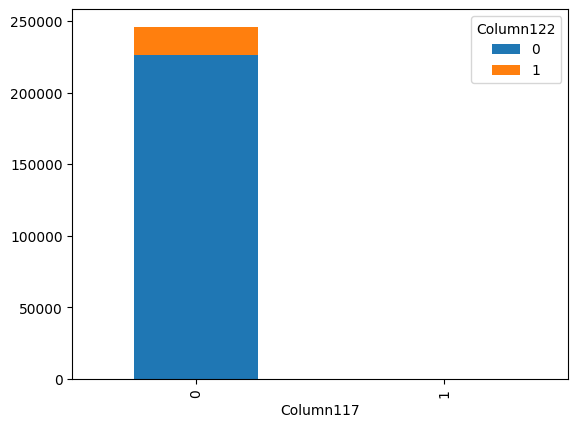

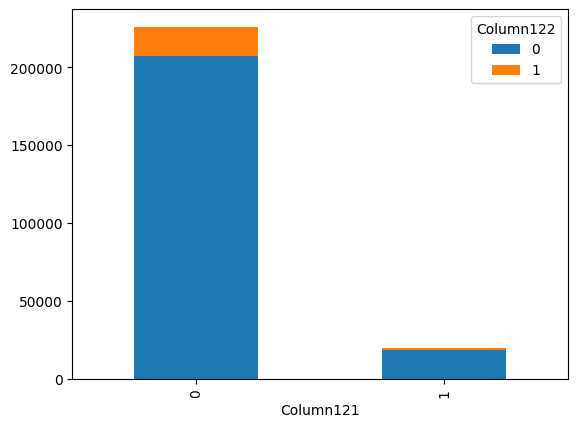

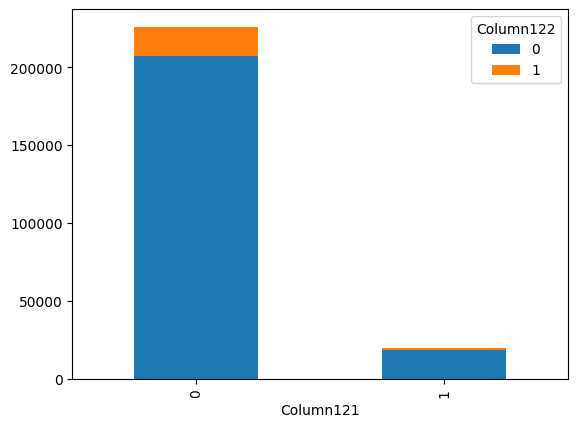

In [14]:
columns = []
for i in binary.columns:
    if i != "Column122":
        crosstable = pd.crosstab(binary[i], df.Column122)
        for b in range(0, 2): #because my crosstable is a 2x2 matrix, i give the range 2 to access rows
            for c in range(0, 2): #same here, this time to access the columns
                value = crosstable.iloc[b,c] #here i access the count of each combo of 1 and 0's. like (0,0), (0,1), (1,0), (1,1)
                if value < 250: #here i want to access those combinations of 1-0 where there is less than 250 of 0 or 1
                    columns.append([i, value, [b,c]]) #i want to see which columns they belong to and where they are in the crosstable
    crosstable.plot(kind="bar", stacked=True) #here i visualize the crosstables to better look at the problems
    plt.show()

In [15]:
cols = []
for i in columns:
    cols.append(i[0])

In [16]:
cols = set(cols)

In [17]:
cols = list(cols)
cols

['Column82',
 'Column9',
 'Column47',
 'Column117',
 'Column16',
 'Column24',
 'Column20',
 'Column98',
 'Column106',
 'Column27',
 'Column101',
 'Column34',
 'Column109',
 'Column43',
 'Column95',
 'Column77',
 'Column66',
 'Column76']

In [18]:
binary = binary.drop(cols, axis=1)

In [19]:
binary

,Column6,Column21,Column25,Column29,Column30,Column48,Column51,Column53,Column56,Column63,Column65,Column72,Column99,Column104,Column105,Column107,Column121,Column122
0,Y,0,0,0,0,Y,1,0,0,0,1,1,0,Cass,1,0,0,0
1,N,1,0,0,0,Y,0,0,0,0,1,0,0,Cass,1,0,0,1
2,N,1,0,0,0,N,0,0,0,0,1,0,0,Cass,1,0,0,1
3,N,0,0,0,0,Y,0,0,0,0,1,0,0,Cass,1,0,0,0
4,N,1,0,0,0,Y,0,0,0,0,0,0,0,Revs,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246002,N,0,1,0,0,Y,0,0,0,0,0,0,0,Revs,1,0,0,0
246003,N,0,0,0,0,N,0,0,0,0,1,0,0,Cass,1,0,0,0
246004,N,0,0,0,1,N,0,0,0,0,0,0,0,Cass,0,0,0,0
246005,N,1,0,0,0,Y,0,0,0,0,1,0,0,Cass,0,0,0,1


In [20]:
categorical = pd.DataFrame(categorical).T
numerical = pd.DataFrame(numerical).T

C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


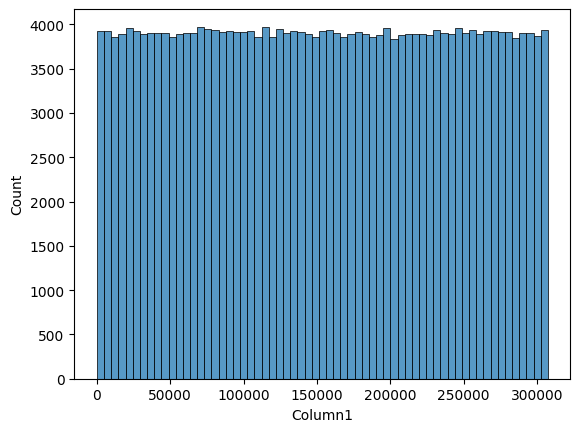

C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


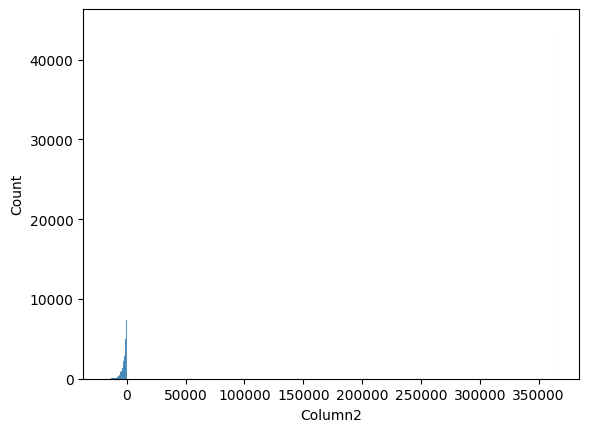

C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


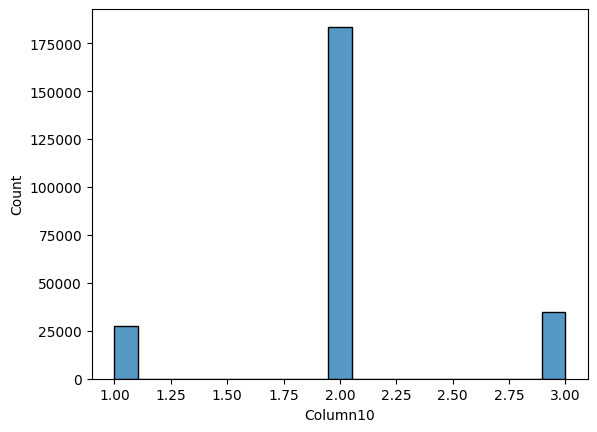

C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


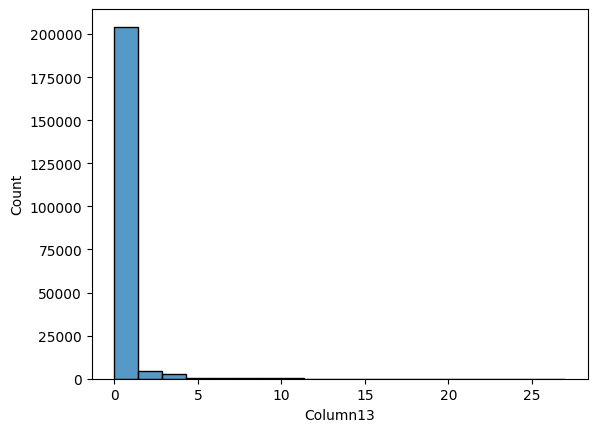

C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


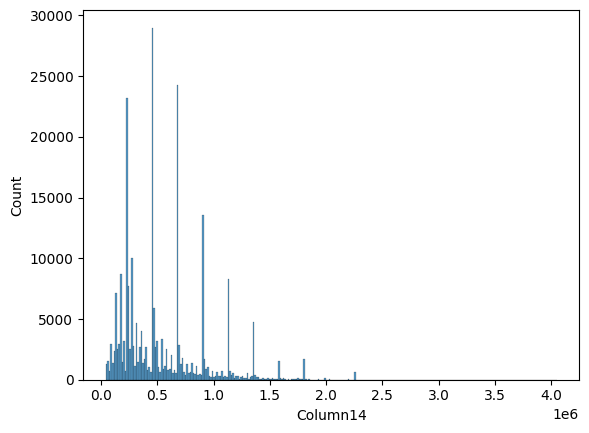

C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


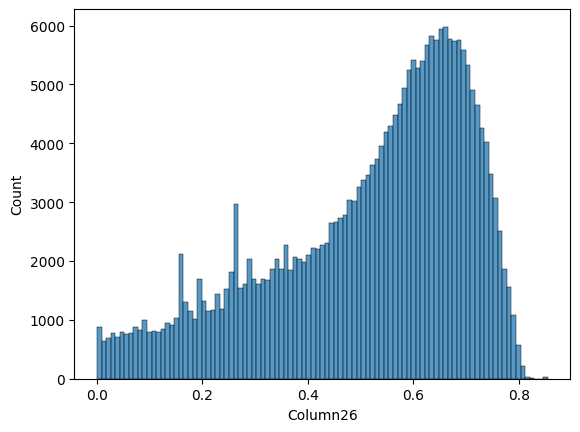

C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


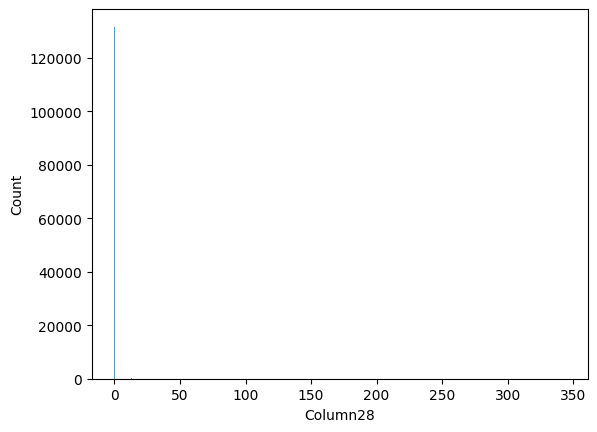

C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


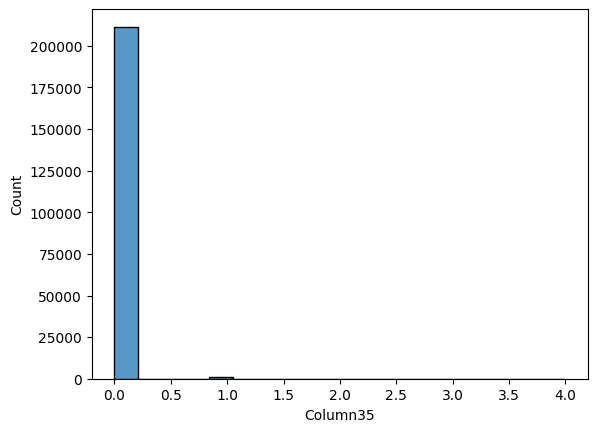

C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


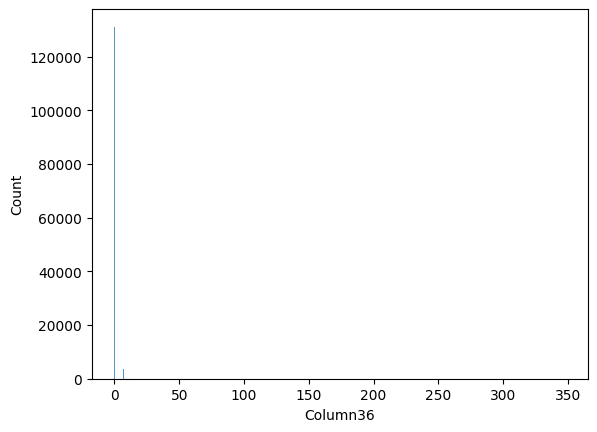

C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


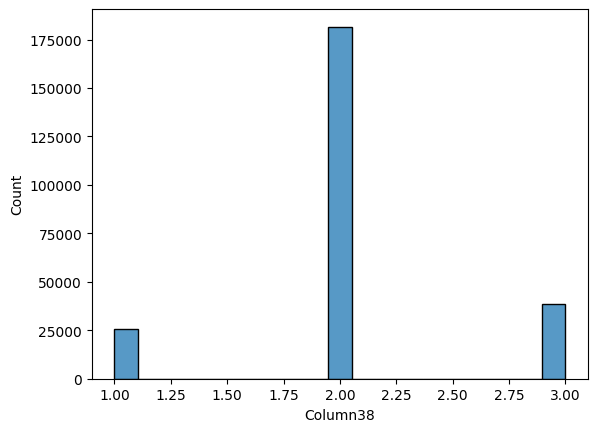

C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


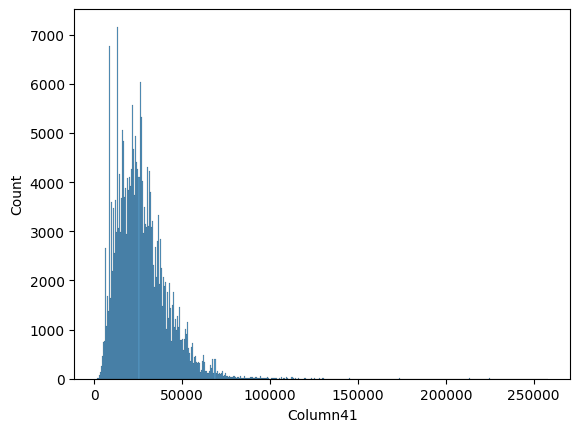

C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


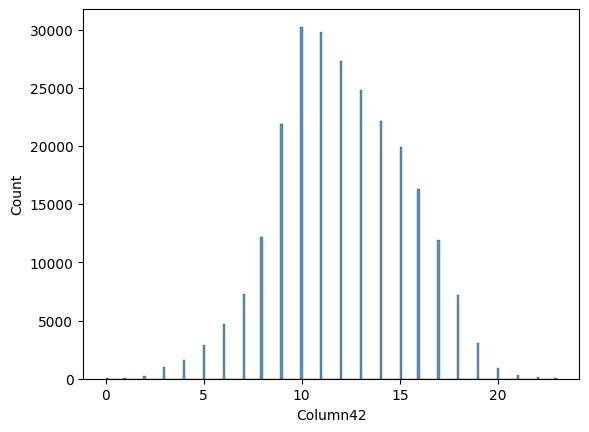

C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


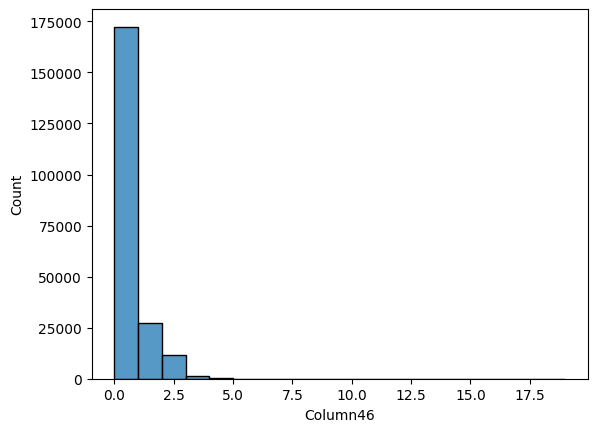

C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


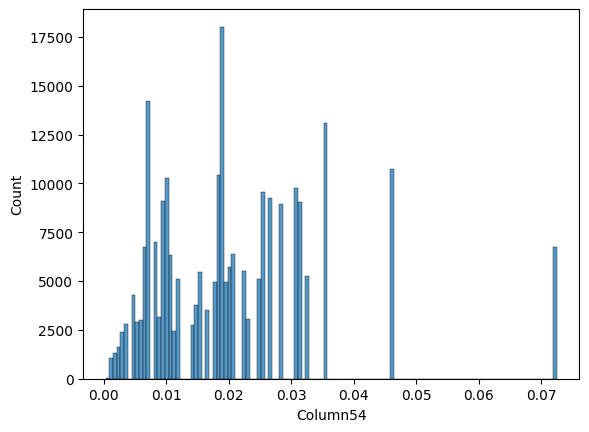

C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


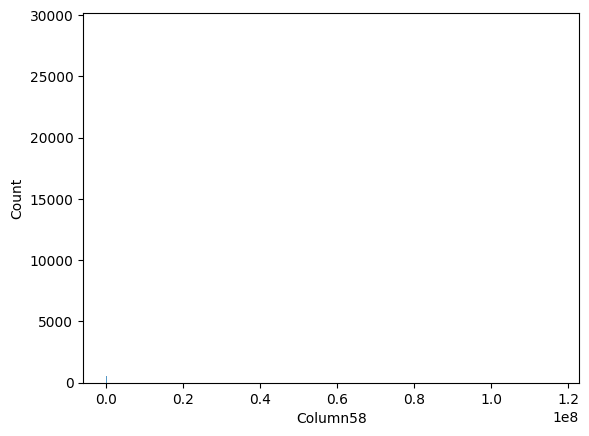

C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


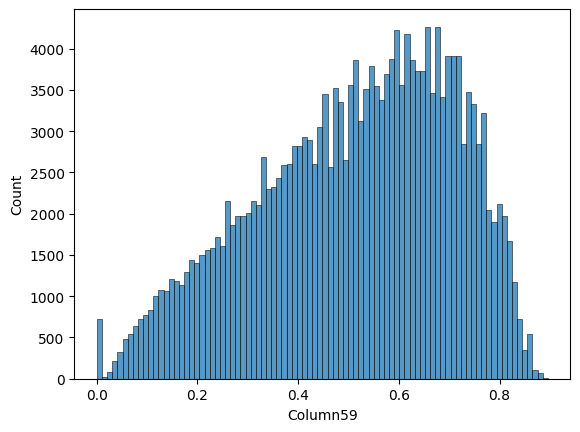

C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


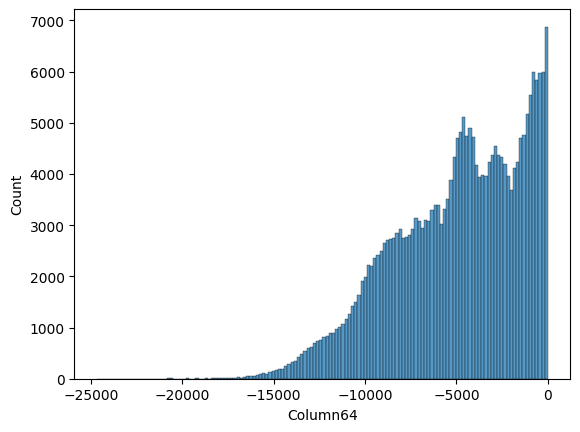

C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


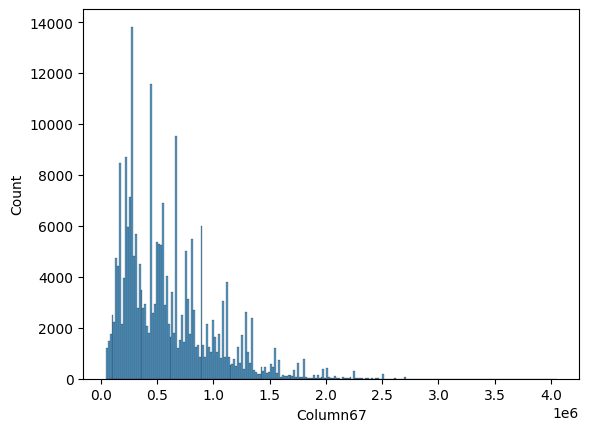

C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


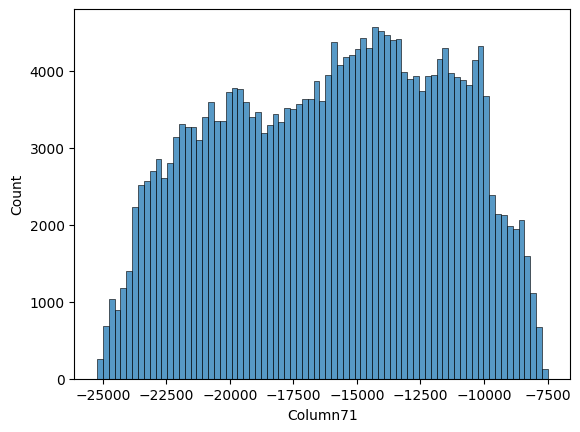

C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


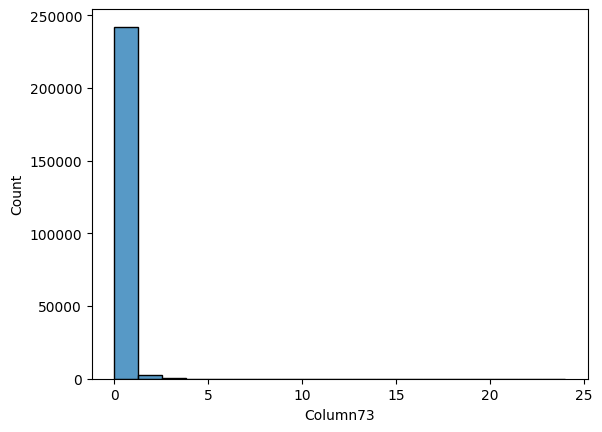

C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


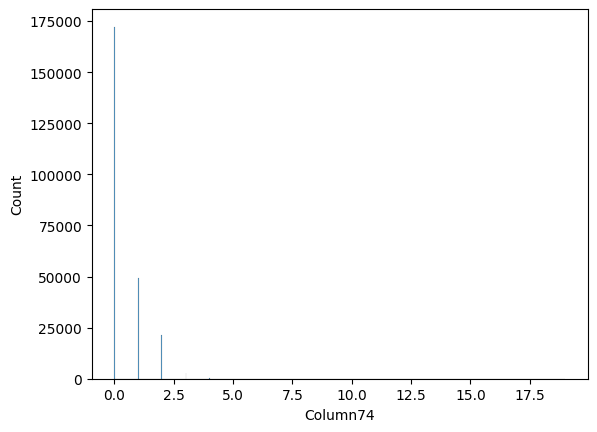

C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


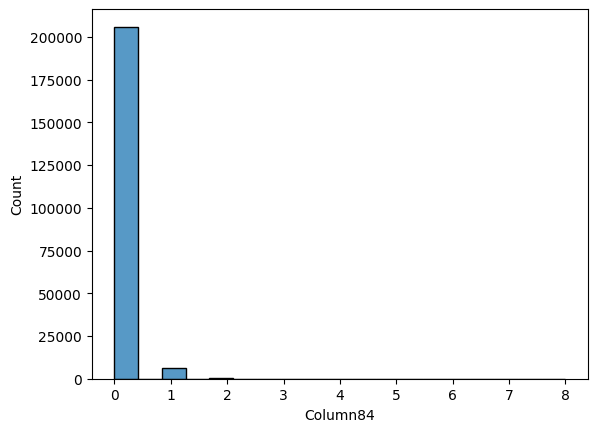

C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


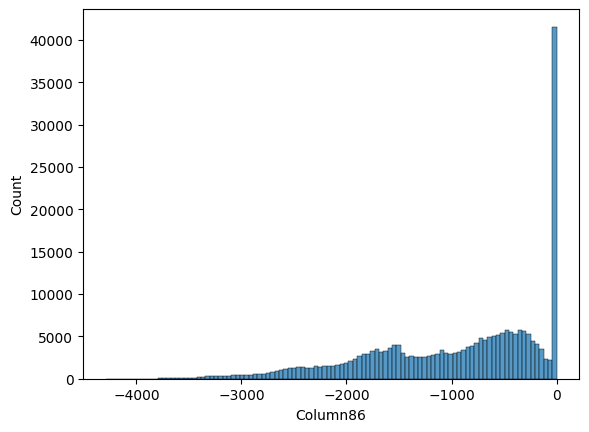

C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


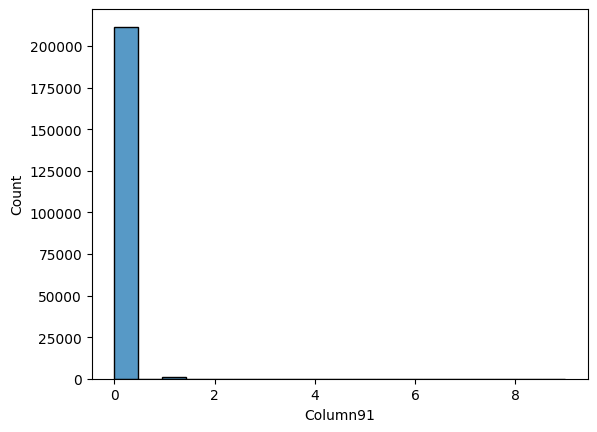

C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


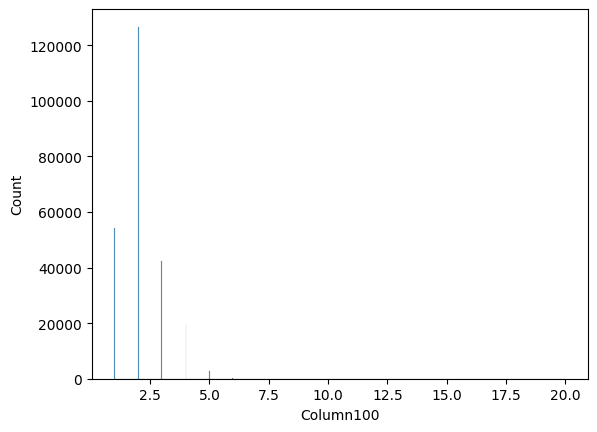

C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


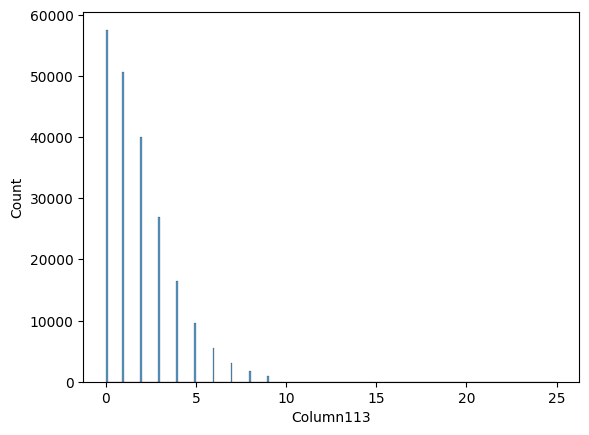

C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


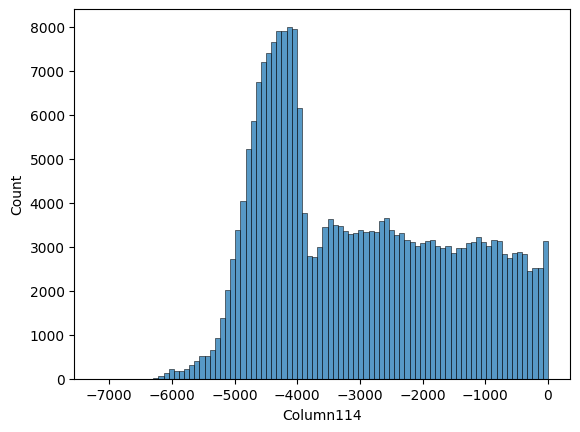

C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


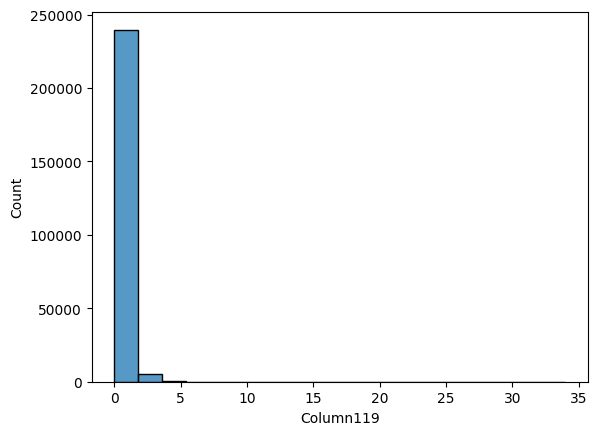

In [21]:
for i in numerical.columns:
    sns.histplot(df, x= i)
    plt.show()

In [22]:
colstodrop = ["Column35", "Column84", "Column91", "Column119"]
numerical= numerical.drop(colstodrop, axis=1)

In [23]:
numerical.isnull().sum()

Column1          0
Column2          0
Column10         0
Column13     33244
Column14       221
Column26       531
Column28       811
Column36       811
Column38         0
Column41        10
Column42         0
Column46     33244
Column54         0
Column58         0
Column59     48805
Column64         0
Column67         0
Column71         0
Column73       811
Column74         0
Column86         1
Column100        2
Column113    33244
Column114        0
dtype: int64

In [24]:
left = []
right = []
norm = []
for i in numerical.columns:
    if numerical[i].mean() > numerical[i].median():
        left.append(i)
    elif numerical[i].mean() <numerical[i].median():
        right.append(i)
    else:
        norm.append(i)

#Here i check whether the column is skewed or normal distributed, which i know normally distributed to be none since i saw histograms, still. 
#By doing this I will decide whether to impute with median or mean.

In [25]:
for i in numerical.columns:
    if i in left or i in right:
        numerical[i] = numerical[i].fillna(numerical[i].median())

In [26]:
numerical.isnull().sum()

Column1      0
Column2      0
Column10     0
Column13     0
Column14     0
Column26     0
Column28     0
Column36     0
Column38     0
Column41     0
Column42     0
Column46     0
Column54     0
Column58     0
Column59     0
Column64     0
Column67     0
Column71     0
Column73     0
Column74     0
Column86     0
Column100    0
Column113    0
Column114    0
dtype: int64

In [27]:
categorical.isnull().sum()

Column7         0
Column17     1029
Column31        0
Column32        0
Column68        0
Column70        0
Column94        0
Column118       0
dtype: int64

In [28]:
for i in categorical.columns:
    categorical[i] = categorical[i].fillna(categorical[i].mode()[0])

In [29]:
categorical.isnull().sum()

Column7      0
Column17     0
Column31     0
Column32     0
Column68     0
Column70     0
Column94     0
Column118    0
dtype: int64

In [30]:
corr_matr = numerical.corr()

<Axes: >

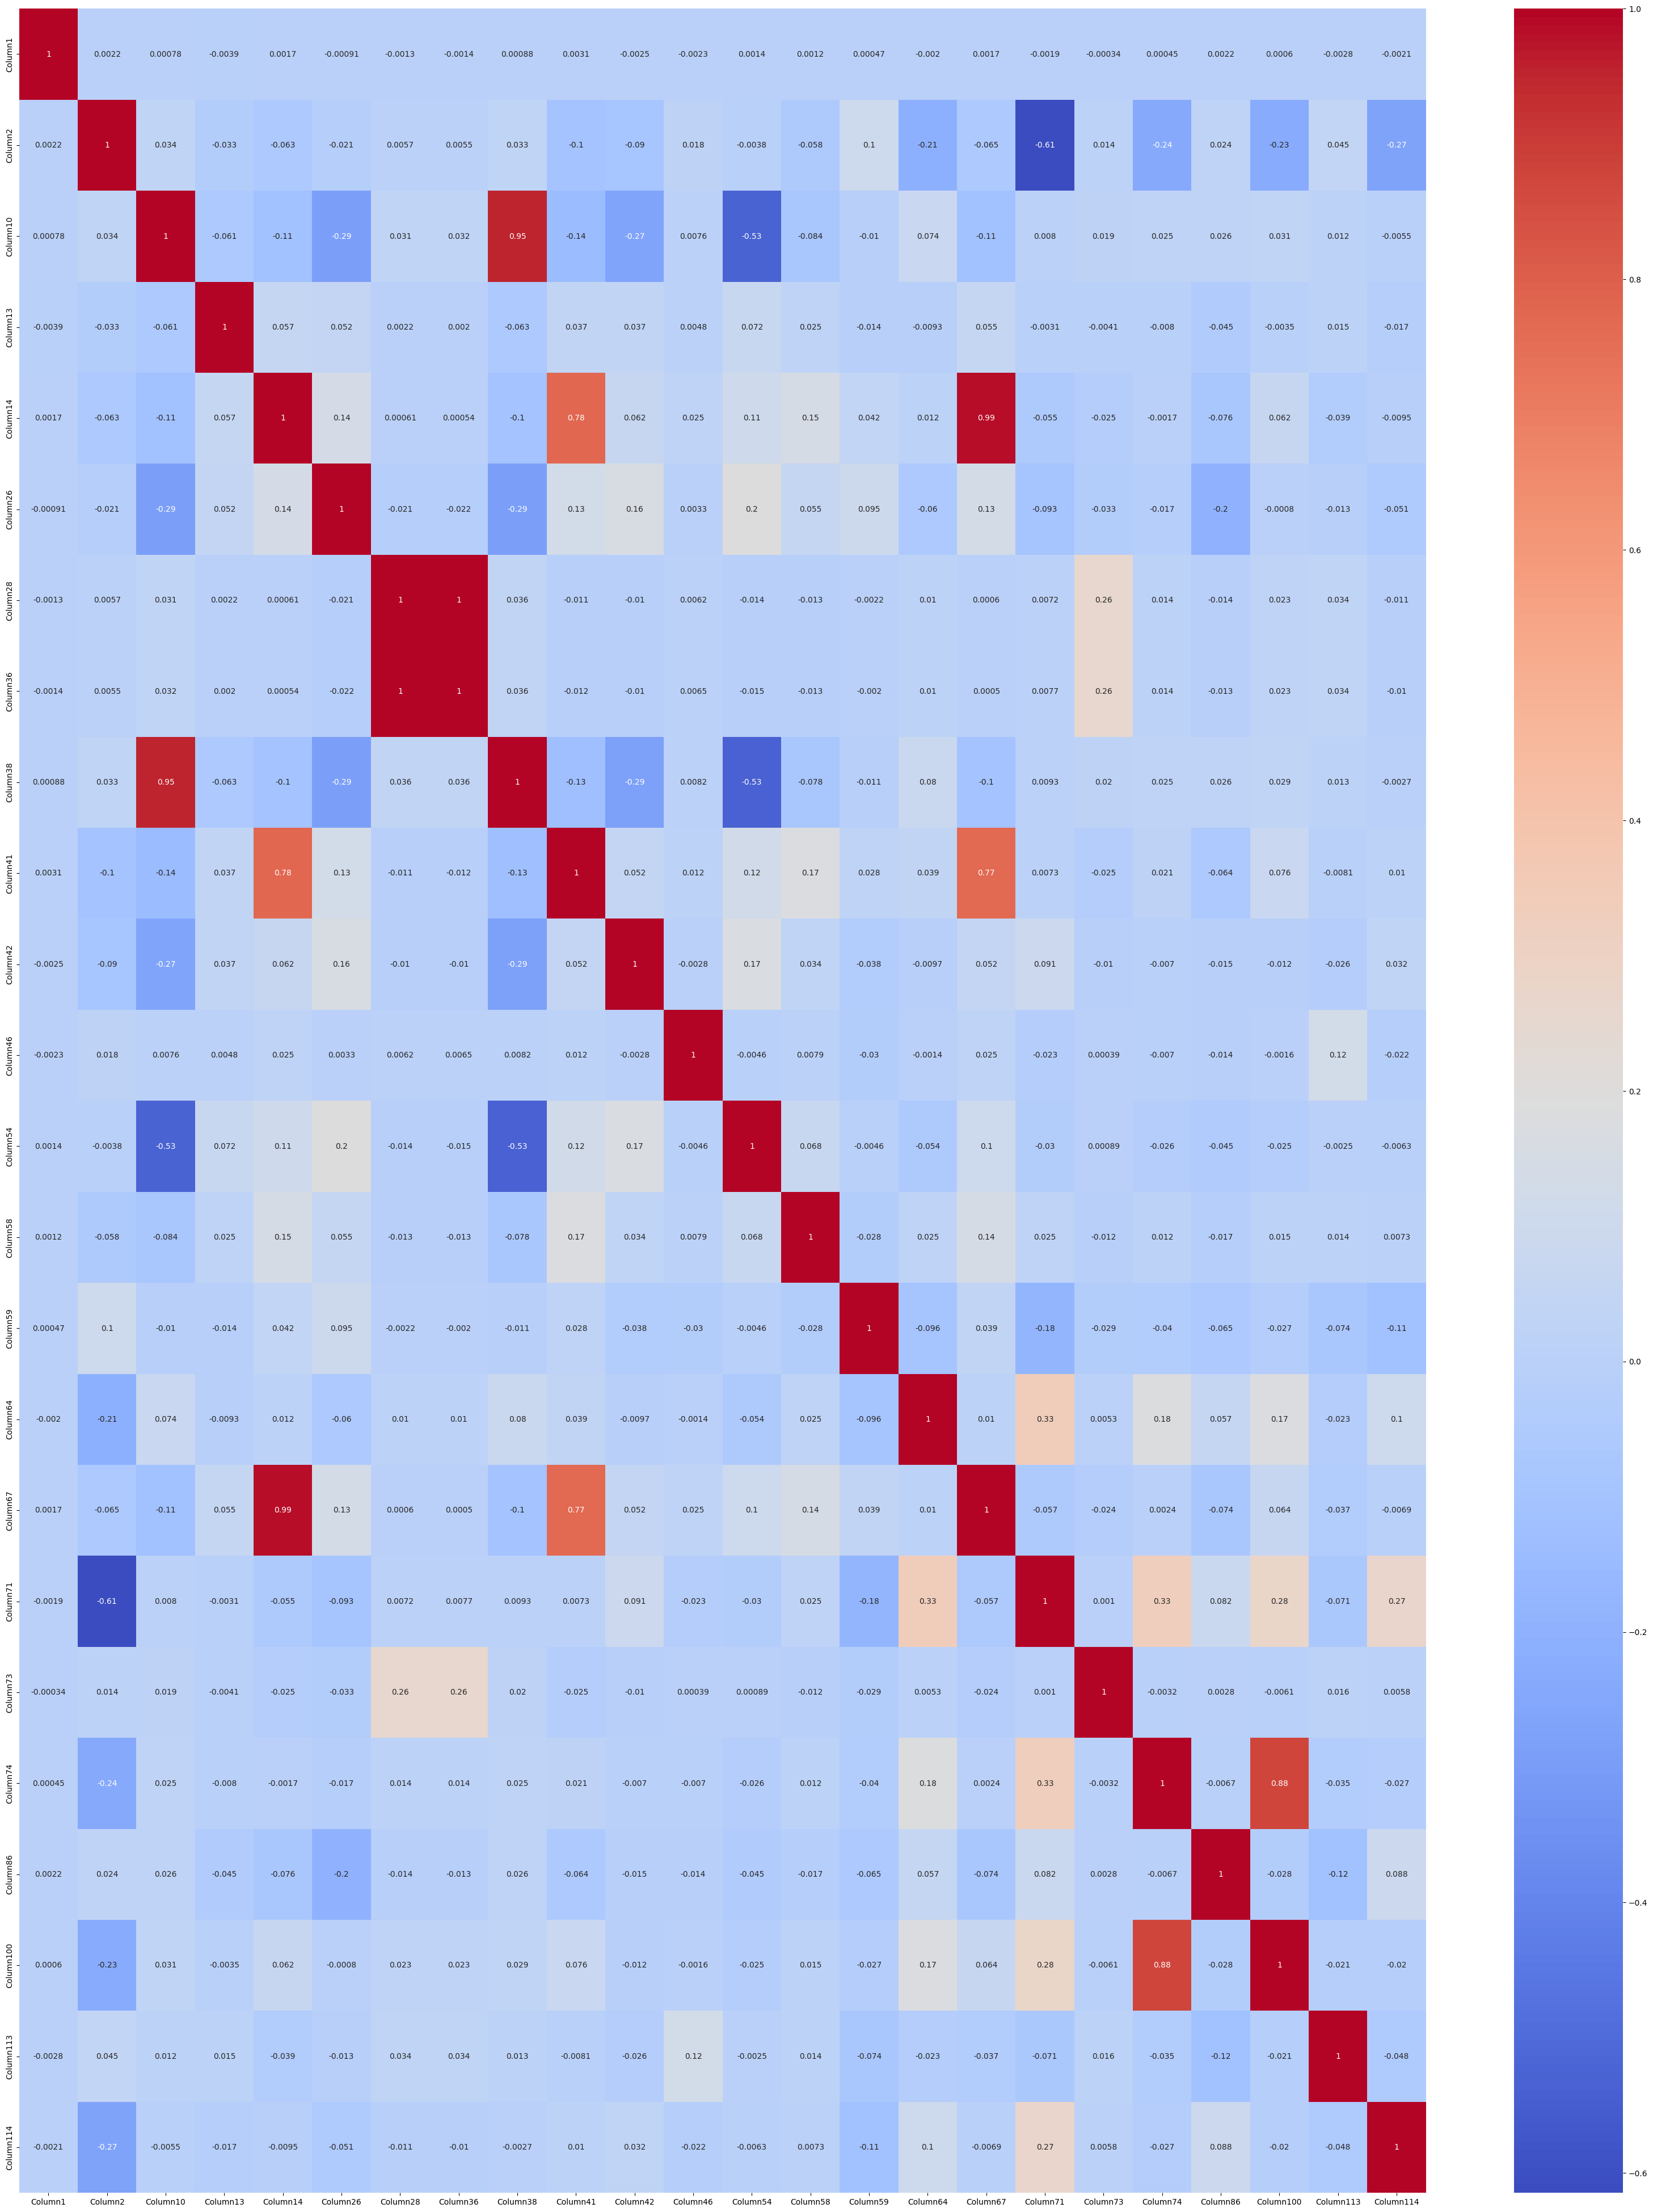

In [31]:
plt.figure(figsize = (40,50))
sns.heatmap(corr_matr, cmap = "coolwarm", annot= True)

In [32]:
for col in corr_matr:
    for index in corr_matr:
        if col != index:
            x = corr_matr.loc[index,col]
            if col in numerical.columns and index in numerical.columns:
                if x > 0.70 or x < -0.70:
                    if numerical[col].std() > numerical[index].std():
                        numerical.drop(index, axis=1, inplace=True)
                    else:
                        numerical.drop(col,axis=1, inplace=True)
#In this parse of code, I check if the correlation matrix value is bigger than a threshold, which is 0.70 here, and then drop the column if it is.

In [33]:
numerical

,Column1,Column2,Column13,Column26,Column36,Column38,Column42,Column46,Column54,Column58,Column59,Column64,Column67,Column71,Column73,Column86,Column100,Column113,Column114
0,236977.0,-92.0,0.0,0.514261,2.0,3.0,13.0,0.0,0.003069,90000.0,0.535276,-1292.0,161730.0,-15375.0,0.0,-509.0,2.0,1.0,-1994.0
1,168821.0,-1646.0,0.0,0.486906,1.0,3.0,5.0,0.0,0.020713,135000.0,0.598926,-7951.0,728847.0,-19307.0,0.0,-1474.0,1.0,2.0,-2842.0
2,94708.0,-1651.0,0.0,0.675705,2.0,2.0,10.0,0.0,0.011703,135000.0,0.454321,-1033.0,474183.0,-17791.0,0.0,-2016.0,1.0,4.0,-1345.0
3,84556.0,-977.0,0.0,0.154565,0.0,2.0,5.0,0.0,0.006629,180000.0,0.535276,-2873.0,254700.0,-8486.0,0.0,-695.0,1.0,1.0,-852.0
4,114510.0,365243.0,3.0,0.627827,5.0,2.0,13.0,1.0,0.031329,74250.0,0.643026,-10391.0,225000.0,-22373.0,0.0,-399.0,2.0,2.0,-4138.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246002,248161.0,-595.0,0.0,0.549668,1.0,2.0,14.0,0.0,0.035792,135000.0,0.535276,-6831.0,405000.0,-15374.0,0.0,-379.0,3.0,1.0,-4420.0
246003,257069.0,-4334.0,0.0,0.569702,0.0,2.0,8.0,1.0,0.018801,157500.0,0.600658,-8490.0,272520.0,-19035.0,0.0,-374.0,1.0,4.0,-2561.0
246004,154350.0,365243.0,0.0,0.461966,1.0,2.0,11.0,0.0,0.025164,90000.0,0.683269,-8975.0,246357.0,-23088.0,0.0,-1689.0,2.0,1.0,-4636.0
246005,148183.0,365243.0,0.0,0.459173,1.0,3.0,9.0,0.0,0.018209,112500.0,0.812823,-10162.0,810000.0,-22148.0,0.0,-1329.0,2.0,5.0,-4636.0


In [34]:
for i in binary.columns:
    print(binary[i].unique(), i)

['Y' 'N'] Column6
[0 1] Column21
[0 1] Column25
[0 1] Column29
[0 1] Column30
['Y' 'N'] Column48
[1 0] Column51
[0 1] Column53


[0 1] Column56
[0 1] Column63
[1 0] Column65
[1 0] Column72
[0 1] Column99
['Cass' 'Revs'] Column104
[1 0] Column105
[0 1] Column107
[0 1] Column121
[0 1] Column122


In [35]:
N_Y = {
    "N": 0,
    "Y": 1
}
binary.Column6 = binary.Column6.map(N_Y)
binary.Column48 = binary.Column48.map(N_Y)

In [36]:
cs = {
    "Cass": 0,
    "Revs": 1
}
binary.Column104 = binary.Column104.map(cs)

In [37]:
import scipy.stats as stats
from scipy.stats import chi2_contingency


In [38]:
significant = []
for i in categorical.columns:
    crosstable = pd.crosstab(df[i], df["Column122"])
    stats, p, _, _ = chi2_contingency(crosstable)
    print("stats:", stats, "p:", p , i )
    if p < 0.05:
        significant.append(i)
significant

stats: 1278.4091021317286 p: 9.041374740582159e-235 Column7
stats: 29.027343241458105 p: 6.011632870115257e-05 Column17
stats: 953.2590220045084 p: 1.5086507190758204e-201 Column31
stats: 340.9547997918352 p: 1.5498354795019367e-71 Column32


stats: 792.4840740052837 p: 3.2608065288152888e-170 Column68
stats: 732.9970761737101 p: 6.787460000920162e-160 Column70
stats: 13.131308607841053 p: 0.040997503517608586 Column94
stats: 438.5810305410939 p: 1.4262647002810918e-92 Column118


['Column7',
 'Column17',
 'Column31',
 'Column32',
 'Column68',
 'Column70',
 'Column94',
 'Column118']

In [39]:
significantbinary = []
for i in binary.columns:
    if i != "Column122":
        crosstable = pd.crosstab(df[i], df["Column122"])
        stats, p, _, _ = chi2_contingency(crosstable)
        print("stats:", stats, "p:", p , i )
        if p < 0.05:
            significantbinary.append(i)
significantbinary


stats: 108.64838762757523 p: 1.9378565190009415e-25 Column6
stats: 139.4033683231854 p: 3.5948868453412377e-32 Column21
stats: 196.84286051942115 p: 1.0205098659528687e-44 Column25
stats: 1.6794699030625966 p: 0.19499490481358664 Column29
stats: 190.50553049792362 p: 2.465956483493724e-43 Column30
stats: 8.28060102906756 p: 0.004007086305921388 Column48
stats: 273.10506707600086 p: 2.3888422264280335e-61 Column51
stats: 10.971689496555017 p: 0.000925143766036801 Column53
stats: 5.404051601200029 p: 0.020090061586127136 Column56
stats: 0.06950128963205118 p: 0.7920642900157333 Column63
stats: 482.41319912876486 p: 6.377341084064823e-107 Column65
stats: 656.2084283707034 p: 9.974936235259286e-145 Column72
stats: 512.1069773171944 p: 2.2069808507267052e-113 Column99
stats: 232.07713690490652 p: 2.100691710125898e-52 Column104
stats: 529.3795349939991 p: 3.854202261516261e-117 Column105
stats: 0.025879678880438284 p: 0.8721945132379906 Column107
stats: 18.045143266387228 p: 2.1572826652476

['Column6',
 'Column21',
 'Column25',
 'Column30',
 'Column48',
 'Column51',
 'Column53',
 'Column56',
 'Column65',
 'Column72',
 'Column99',
 'Column104',
 'Column105',
 'Column121']

In [40]:
categorical = categorical[significant]

In [41]:
significantbinary.append("Column122")

In [42]:
significantbinary

['Column6',
 'Column21',
 'Column25',
 'Column30',
 'Column48',
 'Column51',
 'Column53',
 'Column56',
 'Column65',
 'Column72',
 'Column99',
 'Column104',
 'Column105',
 'Column121',
 'Column122']

In [43]:
binary = binary[significantbinary]


In [44]:
binary

,Column6,Column21,Column25,Column30,Column48,Column51,Column53,Column56,Column65,Column72,Column99,Column104,Column105,Column121,Column122
0,1,0,0,0,1,1,0,0,1,1,0,0,1,0,0
1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1
2,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
4,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246002,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0
246003,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
246004,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
246005,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1


In [45]:
df = pd.concat([categorical, numerical, binary], axis= 1)

In [46]:
df

,Column7,Column17,Column31,Column32,Column68,Column70,Column94,Column118,Column1,Column2,...,Column51,Column53,Column56,Column65,Column72,Column99,Column104,Column105,Column121,Column122
0,Othr,Unad,Come,Hout,Secl,M,TUEY,Mard,236977.0,-92.0,...,1,0,0,1,1,0,0,1,0,0
1,Bus3,Spor,Worg,Hout,Secl,M,TUEY,Sind,168821.0,-1646.0,...,0,0,0,1,0,0,0,1,0,1
2,Bus3,Unad,Come,Hout,Secl,M,TUEY,Sind,94708.0,-1651.0,...,0,0,0,1,0,0,0,1,0,1
3,Rest,Unad,Come,Hout,Incr,F,MONY,Sind,84556.0,-977.0,...,0,0,0,1,0,0,0,1,0,0
4,XNAA,Unad,Penr,Hout,Hign,F,THUY,Mard,114510.0,365243.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246002,Bus3,Unad,Come,Hout,Secl,F,MONY,Mard,248161.0,-595.0,...,0,0,0,0,0,0,1,1,0,0
246003,Mede,Unad,Stat,Hout,Secl,F,MONY,Sind,257069.0,-4334.0,...,0,0,0,1,0,0,0,1,0,0
246004,XNAA,Unad,Penr,Hout,Secl,F,SUNY,Cive,154350.0,365243.0,...,0,0,0,0,0,0,0,0,0,0
246005,XNAA,Chin,Penr,Hout,Secl,F,WEDY,Mard,148183.0,365243.0,...,0,0,0,1,0,0,0,0,0,1


In [47]:
df

,Column7,Column17,Column31,Column32,Column68,Column70,Column94,Column118,Column1,Column2,...,Column51,Column53,Column56,Column65,Column72,Column99,Column104,Column105,Column121,Column122
0,Othr,Unad,Come,Hout,Secl,M,TUEY,Mard,236977.0,-92.0,...,1,0,0,1,1,0,0,1,0,0
1,Bus3,Spor,Worg,Hout,Secl,M,TUEY,Sind,168821.0,-1646.0,...,0,0,0,1,0,0,0,1,0,1
2,Bus3,Unad,Come,Hout,Secl,M,TUEY,Sind,94708.0,-1651.0,...,0,0,0,1,0,0,0,1,0,1
3,Rest,Unad,Come,Hout,Incr,F,MONY,Sind,84556.0,-977.0,...,0,0,0,1,0,0,0,1,0,0
4,XNAA,Unad,Penr,Hout,Hign,F,THUY,Mard,114510.0,365243.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246002,Bus3,Unad,Come,Hout,Secl,F,MONY,Mard,248161.0,-595.0,...,0,0,0,0,0,0,1,1,0,0
246003,Mede,Unad,Stat,Hout,Secl,F,MONY,Sind,257069.0,-4334.0,...,0,0,0,1,0,0,0,1,0,0
246004,XNAA,Unad,Penr,Hout,Secl,F,SUNY,Cive,154350.0,365243.0,...,0,0,0,0,0,0,0,0,0,0
246005,XNAA,Chin,Penr,Hout,Secl,F,WEDY,Mard,148183.0,365243.0,...,0,0,0,1,0,0,0,0,0,1


In [48]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [49]:
obj = []
for i in df.columns:
    if df[i].dtypes == "object":
        if set(df[i].unique()) != {0,1}:
            obj.append(i)

In [50]:
df[obj]

,Column7,Column17,Column31,Column32,Column68,Column70,Column94,Column118
0,Othr,Unad,Come,Hout,Secl,M,TUEY,Mard
1,Bus3,Spor,Worg,Hout,Secl,M,TUEY,Sind
2,Bus3,Unad,Come,Hout,Secl,M,TUEY,Sind
3,Rest,Unad,Come,Hout,Incr,F,MONY,Sind
4,XNAA,Unad,Penr,Hout,Hign,F,THUY,Mard
...,...,...,...,...,...,...,...,...
246002,Bus3,Unad,Come,Hout,Secl,F,MONY,Mard
246003,Mede,Unad,Stat,Hout,Secl,F,MONY,Sind
246004,XNAA,Unad,Penr,Hout,Secl,F,SUNY,Cive
246005,XNAA,Chin,Penr,Hout,Secl,F,WEDY,Mard


In [51]:
columnstoencode = []
for i in df[obj].columns:
    if i != "Column7":
        columnstoencode.append(i)

In [52]:
columnstoencode1 = df[columnstoencode]
columnstoencode1

,Column17,Column31,Column32,Column68,Column70,Column94,Column118
0,Unad,Come,Hout,Secl,M,TUEY,Mard
1,Spor,Worg,Hout,Secl,M,TUEY,Sind
2,Unad,Come,Hout,Secl,M,TUEY,Sind
3,Unad,Come,Hout,Incr,F,MONY,Sind
4,Unad,Penr,Hout,Hign,F,THUY,Mard
...,...,...,...,...,...,...,...
246002,Unad,Come,Hout,Secl,F,MONY,Mard
246003,Unad,Stat,Hout,Secl,F,MONY,Sind
246004,Unad,Penr,Hout,Secl,F,SUNY,Cive
246005,Chin,Penr,Hout,Secl,F,WEDY,Mard


In [53]:
onehot = OneHotEncoder(handle_unknown='ignore')
onehot.fit(columnstoencode1)

OneHotEncoder(handle_unknown='ignore')

In [54]:
transformed = onehot.transform(columnstoencode1)

In [55]:
transformeddf = pd.DataFrame(transformed.toarray(), columns= onehot.get_feature_names_out())
transformeddf.head(-50)

,Column17_Chin,Column17_Famy,Column17_Groe,Column17_OthA,Column17_OthB,Column17_Spor,Column17_Unad,Column31_Busn,Column31_Come,Column31_Mate,...,Column94_SUNY,Column94_THUY,Column94_TUEY,Column94_WEDY,Column118_Cive,Column118_Mard,Column118_Sepd,Column118_Sind,Column118_Unkn,Column118_Widw
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245952,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
245953,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
245954,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
245955,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [56]:
df= df.drop(columnstoencode1, axis=1)

In [57]:
df = pd.concat([df, transformeddf],axis=1)

In [58]:
df

,Column7,Column1,Column2,Column13,Column26,Column36,Column38,Column42,Column46,Column54,...,Column94_SUNY,Column94_THUY,Column94_TUEY,Column94_WEDY,Column118_Cive,Column118_Mard,Column118_Sepd,Column118_Sind,Column118_Unkn,Column118_Widw
0,Othr,236977.0,-92.0,0.0,0.514261,2.0,3.0,13.0,0.0,0.003069,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Bus3,168821.0,-1646.0,0.0,0.486906,1.0,3.0,5.0,0.0,0.020713,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Bus3,94708.0,-1651.0,0.0,0.675705,2.0,2.0,10.0,0.0,0.011703,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,Rest,84556.0,-977.0,0.0,0.154565,0.0,2.0,5.0,0.0,0.006629,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,XNAA,114510.0,365243.0,3.0,0.627827,5.0,2.0,13.0,1.0,0.031329,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246002,Bus3,248161.0,-595.0,0.0,0.549668,1.0,2.0,14.0,0.0,0.035792,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
246003,Mede,257069.0,-4334.0,0.0,0.569702,0.0,2.0,8.0,1.0,0.018801,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
246004,XNAA,154350.0,365243.0,0.0,0.461966,1.0,2.0,11.0,0.0,0.025164,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
246005,XNAA,148183.0,365243.0,0.0,0.459173,1.0,3.0,9.0,0.0,0.018209,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [59]:
label = LabelEncoder()
label.fit(df.Column7)
df.Column7 = label.transform(df.Column7)

In [60]:
df

,Column7,Column1,Column2,Column13,Column26,Column36,Column38,Column42,Column46,Column54,...,Column94_SUNY,Column94_THUY,Column94_TUEY,Column94_WEDY,Column118_Cive,Column118_Mard,Column118_Sepd,Column118_Sind,Column118_Unkn,Column118_Widw
0,30,236977.0,-92.0,0.0,0.514261,2.0,3.0,13.0,0.0,0.003069,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,5,168821.0,-1646.0,0.0,0.486906,1.0,3.0,5.0,0.0,0.020713,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,5,94708.0,-1651.0,0.0,0.675705,2.0,2.0,10.0,0.0,0.011703,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,35,84556.0,-977.0,0.0,0.154565,0.0,2.0,5.0,0.0,0.006629,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,50,114510.0,365243.0,3.0,0.627827,5.0,2.0,13.0,1.0,0.031329,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246002,5,248161.0,-595.0,0.0,0.549668,1.0,2.0,14.0,0.0,0.035792,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
246003,27,257069.0,-4334.0,0.0,0.569702,0.0,2.0,8.0,1.0,0.018801,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
246004,50,154350.0,365243.0,0.0,0.461966,1.0,2.0,11.0,0.0,0.025164,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
246005,50,148183.0,365243.0,0.0,0.459173,1.0,3.0,9.0,0.0,0.018209,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [61]:
df.columns

Index(['Column7', 'Column1', 'Column2', 'Column13', 'Column26', 'Column36',
       'Column38', 'Column42', 'Column46', 'Column54', 'Column58', 'Column59',
       'Column64', 'Column67', 'Column71', 'Column73', 'Column86', 'Column100',
       'Column113', 'Column114', 'Column6', 'Column21', 'Column25', 'Column30',
       'Column48', 'Column51', 'Column53', 'Column56', 'Column65', 'Column72',
       'Column99', 'Column104', 'Column105', 'Column121', 'Column122',
       'Column17_Chin', 'Column17_Famy', 'Column17_Groe', 'Column17_OthA',
       'Column17_OthB', 'Column17_Spor', 'Column17_Unad', 'Column31_Busn',
       'Column31_Come', 'Column31_Mate', 'Column31_Penr', 'Column31_Stat',
       'Column31_Stut', 'Column31_Uned', 'Column31_Worg', 'Column32_Co-t',
       'Column32_Hout', 'Column32_Munt', 'Column32_Offt', 'Column32_Rent',
       'Column32_Wits', 'Column68_Acae', 'Column68_Hign', 'Column68_Incr',
       'Column68_Lowy', 'Column68_Secl', 'Column70_F', 'Column70_M',
       'Column70

In [62]:
df = df.sort_index(axis=1)

In [63]:
df

,Column1,Column100,Column104,Column105,Column113,Column114,Column118_Cive,Column118_Mard,Column118_Sepd,Column118_Sind,...,Column73,Column86,Column94_FRIY,Column94_MONY,Column94_SATY,Column94_SUNY,Column94_THUY,Column94_TUEY,Column94_WEDY,Column99
0,236977.0,2.0,0,1,1.0,-1994.0,0.0,1.0,0.0,0.0,...,0.0,-509.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,168821.0,1.0,0,1,2.0,-2842.0,0.0,0.0,0.0,1.0,...,0.0,-1474.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,94708.0,1.0,0,1,4.0,-1345.0,0.0,0.0,0.0,1.0,...,0.0,-2016.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,84556.0,1.0,0,1,1.0,-852.0,0.0,0.0,0.0,1.0,...,0.0,-695.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
4,114510.0,2.0,1,0,2.0,-4138.0,0.0,1.0,0.0,0.0,...,0.0,-399.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246002,248161.0,3.0,1,1,1.0,-4420.0,0.0,1.0,0.0,0.0,...,0.0,-379.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
246003,257069.0,1.0,0,1,4.0,-2561.0,0.0,0.0,0.0,1.0,...,0.0,-374.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
246004,154350.0,2.0,0,0,1.0,-4636.0,1.0,0.0,0.0,0.0,...,0.0,-1689.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
246005,148183.0,2.0,0,0,5.0,-4636.0,0.0,1.0,0.0,0.0,...,0.0,-1329.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


In [64]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [65]:
X = df.drop("Column122",axis=1)

In [66]:
y= df["Column122"]
y= y.astype("int") #Seems there is a little problem here and the y is interpreted as str

In [67]:
rand = RandomForestClassifier(random_state=42)
rfe = RFE(rand)

In [ ]:
params = {
    "n_features_to_select": [5,10,None],
}

In [ ]:
gridforrfe = GridSearchCV(rfe, params, n_jobs=5, verbose= 3, error_score="raise")


In [ ]:
gridforrfe.fit(X,y)
bestforrfe = gridforrfe.best_estimator_
bestforrfe

Fitting 5 folds for each of 3 candidates, totalling 15 fits


RFE(estimator=RandomForestClassifier(random_state=42))

In [68]:
rfe = RFE(rand, n_features_to_select=None)
rfe.fit(X,y)
rferesult = rfe.support_
rferesult

array([ True,  True, False, False,  True,  True, False,  True, False,
        True, False, False, False,  True, False, False, False, False,
       False, False,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False,  True, False,  True,
       False, False, False, False,  True,  True,  True,  True,  True,
       False, False,  True, False,  True,  True,  True,  True,  True,
        True, False, False, False, False,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True, False])

In [69]:
choices = []
for indexofcol, col in zip(range(len(X.columns)), X.columns):
    if rferesult[indexofcol]:
        choices.append(col)

In [70]:
choices

['Column1',
 'Column100',
 'Column113',
 'Column114',
 'Column118_Mard',
 'Column118_Sind',
 'Column13',
 'Column17_Unad',
 'Column2',
 'Column21',
 'Column25',
 'Column26',
 'Column31_Worg',
 'Column32_Hout',
 'Column36',
 'Column38',
 'Column42',
 'Column46',
 'Column48',
 'Column54',
 'Column58',
 'Column59',
 'Column6',
 'Column64',
 'Column65',
 'Column67',
 'Column68_Secl',
 'Column7',
 'Column70_F',
 'Column71',
 'Column72',
 'Column73',
 'Column86',
 'Column94_FRIY',
 'Column94_MONY',
 'Column94_THUY',
 'Column94_TUEY',
 'Column94_WEDY']

In [71]:
X = X[choices]

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, roc_auc_score

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42, stratify=y, shuffle=True)

In [74]:
rand = RandomForestClassifier(max_depth=10, random_state=42)
rand.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [75]:
y_pred = rand.predict(X_test)
y_pred_proba = rand.predict_proba(X_test)[:, 1]

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

print("cm:", cm, "acc:", accuracy, "f1:", f1, "auc:", auc)

cm: [[45230     0]
 [ 3972     0]] acc: 0.919271574326247 f1: 0.0 auc: 0.7304247408178275


In [76]:
from sklearn.ensemble import HistGradientBoostingClassifier, GradientBoostingClassifier

In [77]:
hist = HistGradientBoostingClassifier(loss="log_loss", random_state=42 , class_weight="balanced")

In [78]:
params ={
    "learning_rate": [0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 10, 20, None],
    'min_samples_leaf': [1, 2, 5, 10, 20],
}

In [79]:
gridforhist = GridSearchCV(hist, params, verbose=2, n_jobs=10)
gridforhist.fit(X_train, y_train)
bestforhist = gridforhist.best_estimator_
bestforhist

Fitting 5 folds for each of 90 candidates, totalling 450 fits


C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


HistGradientBoostingClassifier(class_weight='balanced', max_depth=5,
                               min_samples_leaf=5, random_state=42)

In [83]:
hist = HistGradientBoostingClassifier(random_state=42, max_depth=5, min_samples_leaf=5, class_weight="balanced")

In [84]:
hist.fit(X_train, y_train)
y_pred = hist.predict(X_test)
y_pred_proba = hist.predict_proba(X_test)[:, 1]

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

print("cm:", cm, "acc:", accuracy, "f1:", f1, "auc:", auc)

cm: [[31551 13679]
 [ 1376  2596]] acc: 0.694016503394171 f1: 0.2564330518101447 auc: 0.7392436309082882


In [121]:
gradient = GradientBoostingClassifier(min_samples_leaf=5, max_depth=5, random_state=42)

In [122]:
gradient.fit(X_train, y_train)
y_pred = gradient.predict(X_test)
y_pred_proba = gradient.predict_proba(X_test)[:, 1]

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

print("cm:", cm, "acc:", accuracy, "f1:", f1, "auc:", auc)

cm: [[45176    54]
 [ 3919    53]] acc: 0.919251249949189 f1: 0.025986761461142437 auc: 0.7392508336600734


Test

In [85]:
testdf = pd.read_csv(r"C:\Users\Aleyna\Desktop\KHAS\KHAS 2022-2023 bahar\Mis220\data\test.csv", sep=",")
testdf = pd.DataFrame(testdf)

In [86]:
testdf

,69769,-946,0.1613,0.7959999999999999,Panl,N,Bus2,0.0742,0,2,...,1.0.1,-4670,0.9851.2,0.0.13,0.26,Mard,0.0.14,0.3333.2,0.27,kaggle_id
0,7632,-4930,NaN,NaN,NaN,N,Govt,NaN,0,2,...,6.0,-1259,NaN,NaN,0,Mard,0.0,NaN,0,1
1,187106,-1191,0.1035,0.7688,Panl,N,Ind4,0.0720,0,2,...,3.0,-2474,0.9831,0.0008,0,Cive,0.0,0.1667,0,2
2,231803,-355,NaN,NaN,NaN,N,Seld,NaN,0,3,...,1.0,-2289,NaN,NaN,0,Sind,1.0,NaN,0,3
3,57374,-1366,NaN,NaN,NaN,N,Govt,NaN,0,2,...,1.0,-1040,NaN,NaN,0,Cive,0.0,NaN,0,4
4,272765,-451,0.0674,0.8436,Blok,N,Bus3,0.0081,0,2,...,0.0,-2261,0.9886,0.0069,0,Mard,0.0,0.1667,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61497,52564,365243,NaN,NaN,Panl,N,XNAA,NaN,0,2,...,0.0,-3949,0.9826,NaN,0,Widw,1.0,0.0417,0,61498
61498,273964,-1188,0.0875,0.7688,Stok,Y,Bus3,0.0107,0,2,...,1.0,-1325,0.9831,0.0000,0,Mard,0.0,0.3333,0,61499
61499,142812,-1194,NaN,NaN,NaN,Y,Bus2,NaN,0,2,...,1.0,-2815,NaN,NaN,0,Mard,0.0,NaN,1,61500
61500,142075,-1086,NaN,NaN,NaN,Y,Bus3,NaN,0,2,...,2.0,-3991,NaN,NaN,0,Sind,0.0,NaN,0,61501


In [87]:
names = []
count= 0
for i in testdf.columns:
    count+=1
    names.append("Column"+str(count))

In [88]:
testdf.columns = names

In [89]:
testdf

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column113,Column114,Column115,Column116,Column117,Column118,Column119,Column120,Column121,Column122
0,7632,-4930,NaN,NaN,NaN,N,Govt,NaN,0,2,...,6.0,-1259,NaN,NaN,0,Mard,0.0,NaN,0,1
1,187106,-1191,0.1035,0.7688,Panl,N,Ind4,0.0720,0,2,...,3.0,-2474,0.9831,0.0008,0,Cive,0.0,0.1667,0,2
2,231803,-355,NaN,NaN,NaN,N,Seld,NaN,0,3,...,1.0,-2289,NaN,NaN,0,Sind,1.0,NaN,0,3
3,57374,-1366,NaN,NaN,NaN,N,Govt,NaN,0,2,...,1.0,-1040,NaN,NaN,0,Cive,0.0,NaN,0,4
4,272765,-451,0.0674,0.8436,Blok,N,Bus3,0.0081,0,2,...,0.0,-2261,0.9886,0.0069,0,Mard,0.0,0.1667,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61497,52564,365243,NaN,NaN,Panl,N,XNAA,NaN,0,2,...,0.0,-3949,0.9826,NaN,0,Widw,1.0,0.0417,0,61498
61498,273964,-1188,0.0875,0.7688,Stok,Y,Bus3,0.0107,0,2,...,1.0,-1325,0.9831,0.0000,0,Mard,0.0,0.3333,0,61499
61499,142812,-1194,NaN,NaN,NaN,Y,Bus2,NaN,0,2,...,1.0,-2815,NaN,NaN,0,Mard,0.0,NaN,1,61500
61500,142075,-1086,NaN,NaN,NaN,Y,Bus3,NaN,0,2,...,2.0,-3991,NaN,NaN,0,Sind,0.0,NaN,0,61501


In [90]:
testdf = testdf.drop(columns=["Column122"], axis=1)

In [91]:
for c,v in testdf.isnull().sum().items(): 
    if v > (testdf.shape[0]*(0.20)): #if the missing value is more than 20% of the data, then that column is not informative for me
        testdf = testdf.drop(columns=c, axis = 1) #so i drop it

In [92]:
testdf

,Column1,Column2,Column6,Column7,Column9,Column10,Column13,Column14,Column16,Column17,...,Column105,Column106,Column107,Column109,Column113,Column114,Column117,Column118,Column119,Column121
0,7632,-4930,N,Govt,0,2,1.0,315000.0,0,Famy,...,1,0,0,0,6.0,-1259,0,Mard,0.0,0
1,187106,-1191,N,Ind4,0,2,0.0,225000.0,0,Unad,...,1,0,0,0,3.0,-2474,0,Cive,0.0,0
2,231803,-355,N,Seld,0,3,0.0,873000.0,0,Unad,...,1,0,0,0,1.0,-2289,0,Sind,1.0,0
3,57374,-1366,N,Govt,0,2,0.0,279000.0,0,Unad,...,1,0,0,0,1.0,-1040,0,Cive,0.0,0
4,272765,-451,N,Bus3,0,2,1.0,252000.0,0,Unad,...,1,0,0,0,0.0,-2261,0,Mard,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61497,52564,365243,N,XNAA,0,2,0.0,720000.0,0,Unad,...,0,0,0,0,0.0,-3949,0,Widw,1.0,0
61498,273964,-1188,Y,Bus3,0,2,1.0,1305000.0,0,Famy,...,1,0,0,0,1.0,-1325,0,Mard,0.0,0
61499,142812,-1194,Y,Bus2,0,2,0.0,225000.0,0,Unad,...,1,0,0,0,1.0,-2815,0,Mard,0.0,1
61500,142075,-1086,Y,Bus3,0,2,0.0,900000.0,0,Unad,...,1,0,0,0,2.0,-3991,0,Sind,0.0,0


In [93]:
binary = []
categorical = []
numerical = []
for i in testdf.columns:
    if testdf[i].dtypes == "object":
        if testdf[i].nunique() == 2:
            binary.append(testdf[i])
        else: 
            categorical.append(testdf[i])
    elif testdf[i].dtypes == "int64" or testdf[i].dtypes == "float64":
        if testdf[i].nunique() == 2:
            binary.append(testdf[i])
        else:
            numerical.append(testdf[i])
# Here i divided the data into three categories

In [94]:
binary = pd.DataFrame(binary).T
categorical = pd.DataFrame(categorical).T
numerical = pd.DataFrame(numerical).T

In [95]:
binary

,Column6,Column9,Column16,Column20,Column21,Column24,Column25,Column27,Column29,Column30,...,Column98,Column99,Column101,Column104,Column105,Column106,Column107,Column109,Column117,Column121
0,N,0,0,0,0,0,0,0,0,0,...,0,0,0,Cass,1,0,0,0,0,0
1,N,0,0,0,1,0,0,0,0,0,...,0,0,0,Cass,1,0,0,0,0,0
2,N,0,0,0,0,0,1,1,0,0,...,0,1,0,Cass,1,0,0,0,0,0
3,N,0,0,0,0,0,0,0,0,0,...,0,0,0,Cass,1,0,0,0,0,0
4,N,0,0,0,0,0,0,0,0,0,...,0,0,0,Cass,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61497,N,0,0,0,0,0,0,0,0,1,...,0,0,0,Cass,0,0,0,0,0,0
61498,Y,0,0,0,1,0,1,0,0,0,...,0,0,0,Cass,1,0,0,0,0,0
61499,Y,0,0,0,0,0,1,0,0,0,...,0,0,0,Cass,1,0,0,0,0,1
61500,Y,0,0,0,1,0,0,0,1,0,...,0,1,0,Cass,1,0,0,0,0,0


In [96]:
for i in categorical.columns:
    categorical[i] = categorical[i].str.replace(r'\.+', '.', regex=True)


In [97]:
categorical

,Column7,Column17,Column31,Column32,Column68,Column70,Column94,Column118
0,Govt,Famy,Worg,Hout,Secl,F,THUY,Mard
1,Ind4,Unad,Worg,Hout,Secl,M,THUY,Cive
2,Seld,Unad,Worg,Hout,Hign,F,THUY,Sind
3,Govt,Unad,Worg,Hout,Secl,F,SATY,Cive
4,Bus3,Unad,Worg,Munt,Secl,F,MONY,Mard
...,...,...,...,...,...,...,...,...
61497,XNAA,Unad,Penr,Hout,Secl,F,WEDY,Widw
61498,Bus3,Famy,Come,Hout,Hign,M,SATY,Mard
61499,Bus2,Unad,Worg,Hout,Hign,F,SATY,Mard
61500,Bus3,Unad,Worg,Hout,Incr,M,FRIY,Sind


In [98]:
for i in numerical.columns:
    if i in left or i in right:
        testdf[i] = testdf[i].fillna(testdf[i].median())

In [99]:
for i in categorical.columns:
    testdf[i] = testdf[i].fillna(testdf[i].mode()[0])

In [100]:
N_Y = {
    "N": 0,
    "Y": 1
}
testdf.Column6 = testdf.Column6.map(N_Y)
testdf.Column48 = testdf.Column48.map(N_Y)

In [101]:
cs = {
    "Cass": 0,
    "Revs": 1
}
testdf.Column104 = testdf.Column104.map(cs)

In [102]:
columnstoencode2 = testdf[columnstoencode]
columnstoencode2

,Column17,Column31,Column32,Column68,Column70,Column94,Column118
0,Famy,Worg,Hout,Secl,F,THUY,Mard
1,Unad,Worg,Hout,Secl,M,THUY,Cive
2,Unad,Worg,Hout,Hign,F,THUY,Sind
3,Unad,Worg,Hout,Secl,F,SATY,Cive
4,Unad,Worg,Munt,Secl,F,MONY,Mard
...,...,...,...,...,...,...,...
61497,Unad,Penr,Hout,Secl,F,WEDY,Widw
61498,Famy,Come,Hout,Hign,M,SATY,Mard
61499,Unad,Worg,Hout,Hign,F,SATY,Mard
61500,Unad,Worg,Hout,Incr,M,FRIY,Sind


In [103]:
obj2 = testdf[obj]
obj2


,Column7,Column17,Column31,Column32,Column68,Column70,Column94,Column118
0,Govt,Famy,Worg,Hout,Secl,F,THUY,Mard
1,Ind4,Unad,Worg,Hout,Secl,M,THUY,Cive
2,Seld,Unad,Worg,Hout,Hign,F,THUY,Sind
3,Govt,Unad,Worg,Hout,Secl,F,SATY,Cive
4,Bus3,Unad,Worg,Munt,Secl,F,MONY,Mard
...,...,...,...,...,...,...,...,...
61497,XNAA,Unad,Penr,Hout,Secl,F,WEDY,Widw
61498,Bus3,Famy,Come,Hout,Hign,M,SATY,Mard
61499,Bus2,Unad,Worg,Hout,Hign,F,SATY,Mard
61500,Bus3,Unad,Worg,Hout,Incr,M,FRIY,Sind


In [104]:
transformed = onehot.transform(columnstoencode2)

In [105]:
transformeddf = pd.DataFrame(transformed.toarray(), columns= onehot.get_feature_names_out())
transformeddf.head(10)

,Column17_Chin,Column17_Famy,Column17_Groe,Column17_OthA,Column17_OthB,Column17_Spor,Column17_Unad,Column31_Busn,Column31_Come,Column31_Mate,...,Column94_SUNY,Column94_THUY,Column94_TUEY,Column94_WEDY,Column118_Cive,Column118_Mard,Column118_Sepd,Column118_Sind,Column118_Unkn,Column118_Widw
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [106]:
testdf= testdf.drop(columnstoencode2, axis=1)

In [107]:
testdf = pd.concat([testdf, transformeddf],axis=1)

In [108]:
testdf

,Column1,Column2,Column6,Column7,Column9,Column10,Column13,Column14,Column16,Column20,...,Column94_SUNY,Column94_THUY,Column94_TUEY,Column94_WEDY,Column118_Cive,Column118_Mard,Column118_Sepd,Column118_Sind,Column118_Unkn,Column118_Widw
0,7632,-4930,0,Govt,0,2,1.0,315000.0,0,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,187106,-1191,0,Ind4,0,2,0.0,225000.0,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,231803,-355,0,Seld,0,3,0.0,873000.0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,57374,-1366,0,Govt,0,2,0.0,279000.0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,272765,-451,0,Bus3,0,2,1.0,252000.0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61497,52564,365243,0,XNAA,0,2,0.0,720000.0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
61498,273964,-1188,1,Bus3,0,2,1.0,1305000.0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
61499,142812,-1194,1,Bus2,0,2,0.0,225000.0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
61500,142075,-1086,1,Bus3,0,2,0.0,900000.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [109]:
testdf.Column7 = label.transform(testdf.Column7)

In [110]:
testdf = testdf.sort_index(axis=1)
testdf

,Column1,Column10,Column100,Column101,Column104,Column105,Column106,Column107,Column109,Column113,...,Column94_FRIY,Column94_MONY,Column94_SATY,Column94_SUNY,Column94_THUY,Column94_TUEY,Column94_WEDY,Column95,Column98,Column99
0,7632,2,2.0,0,0,1,0,0,0,6.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0
1,187106,2,2.0,0,0,1,0,0,0,3.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0
2,231803,3,1.0,0,0,1,0,0,0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,1
3,57374,2,2.0,0,0,1,0,0,0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0
4,272765,2,3.0,0,0,1,0,0,0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61497,52564,2,1.0,0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0
61498,273964,2,2.0,0,0,1,0,0,0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0
61499,142812,2,3.0,0,0,1,0,0,0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0
61500,142075,2,1.0,0,0,1,0,0,0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1


In [111]:
testdf = testdf[choices]

In [112]:
testdf

,Column1,Column100,Column113,Column114,Column118_Mard,Column118_Sind,Column13,Column17_Unad,Column2,Column21,...,Column70_F,Column71,Column72,Column73,Column86,Column94_FRIY,Column94_MONY,Column94_THUY,Column94_TUEY,Column94_WEDY
0,7632,2.0,6.0,-1259,1.0,0.0,1.0,0.0,-4930,0,...,1.0,-17723,0,0.0,-1491.0,0.0,0.0,1.0,0.0,0.0
1,187106,2.0,3.0,-2474,0.0,0.0,0.0,1.0,-1191,1,...,0.0,-24200,0,0.0,-660.0,0.0,0.0,1.0,0.0,0.0
2,231803,1.0,1.0,-2289,0.0,1.0,0.0,1.0,-355,0,...,1.0,-9650,1,0.0,-757.0,0.0,0.0,1.0,0.0,0.0
3,57374,2.0,1.0,-1040,0.0,0.0,0.0,1.0,-1366,0,...,1.0,-17487,1,0.0,-276.0,0.0,0.0,0.0,0.0,0.0
4,272765,3.0,0.0,-2261,1.0,0.0,1.0,1.0,-451,0,...,1.0,-11471,0,0.0,-8.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61497,52564,1.0,0.0,-3949,0.0,0.0,0.0,1.0,365243,0,...,1.0,-20906,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
61498,273964,2.0,1.0,-1325,1.0,0.0,1.0,0.0,-1188,1,...,0.0,-17790,0,0.0,-883.0,0.0,0.0,0.0,0.0,0.0
61499,142812,3.0,1.0,-2815,1.0,0.0,0.0,1.0,-1194,0,...,1.0,-13369,0,0.0,-577.0,0.0,0.0,0.0,0.0,0.0
61500,142075,1.0,2.0,-3991,0.0,1.0,0.0,1.0,-1086,1,...,0.0,-11364,0,0.0,-1674.0,1.0,0.0,0.0,0.0,0.0


In [113]:
testdf.columns == X.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [130]:
y_pred_proba = hist.predict_proba(testdf)[:, 1]

In [131]:
sample = pd.read_csv(r"C:\Users\Aleyna\Desktop\KHAS\KHAS 2022-2023 bahar\Mis220\data\sample_submission.csv")

In [132]:
sample = pd.DataFrame(sample)
sample = sample.drop(columns= ["target"], axis=1)

In [133]:
sample

,kaggle_id
0,1
1,2
2,3
3,4
4,5
...,...
61497,61498
61498,61499
61499,61500
61500,61501


In [134]:
y_pred_proba = pd.DataFrame(y_pred_proba)
y_pred_proba.columns = ["target"]
y_pred_proba

,target
0,0.279257
1,0.778916
2,0.484670
3,0.470438
4,0.676841
...,...
61497,0.434844
61498,0.543276
61499,0.345597
61500,0.686767


In [135]:
submission = pd.concat([sample, y_pred_proba], axis=1)

In [129]:
submission.to_csv("Submission1", index=False)